#**Technical Assignment: Data Analytics and BI Intern**

This project is based on Company X FSFeedback Data. The feedback data is sourced from a sample of customers with the aim of providing a better understanding and tracking their customer experience for the financial services sector. The data is also for use in experimentation and product development.

For the purpose of this task, the data will be used to derive a few insights, by providing solutions to the following questions:
1. What is the Net Promoter Score by Bank, and by week?
2. Does the Net Promoter Score vary significantly across touchpoints/interaction channels?
3. Does the Net Promoter Score vary by Demographic characteristics?
4. Does the Response rate* vary significantly across any of the characteristics (Customer
Demographics, Bank, Touchpoints, Week, Time of Day)?
5. What themes are most associated with the likelihood to recommend a bank?

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Initial Data Exploration**

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [ ]:
# Reading the dataset
feedback = pd.read_csv("/content/drive/MyDrive/Data Analysis Portfolio/Net Promoter Score/FS Feedback Data.csv")

In [ ]:
# Exploring the head
feedback.head()

,user_id,year_of_birth,gender,region,living_standards_measure,highest_education,employment,internet_access,cable_tv_subscription,survey_completion,survey_participation_consent,bank_account,bank,last_interaction_with_bank,likelihood_to_recommend,comment_on_why,themes,start_time(GMT),time_of_last_update(GMT),week
0,358646,1991.0,Prefer not to answer,NaN,NaN,NaN,Student,Yes,No,TIMEDOUT,-,-,-,-,-,-,NaN,7/20/2021 9:48,7/23/2021 9:51,30
1,18003003,1984.0,Female,coast,5 to 8,Completed Secondary,Student,Yes,Yes,FINISHED,YES,Yes,KCB,Teller or Branch transactions,5,Safrcom don''t allow 1 person to Bank more tha...,speed/efficiency,7/20/2021 10:10,7/23/2021 10:13,30
2,5618870,1994.0,Male,riftvalley,5 to 8,Completed College,Student,Yes,No,FINISHED,YES,Yes,National Bank,Mobile banking,10,They offer good services,service,7/20/2021 10:08,7/23/2021 10:12,30
3,2951848,1995.0,Female,riftvalley,NaN,NaN,Other/Unemployed,Yes,NaN,TIMEDOUT,-,-,-,-,-,-,NaN,7/20/2021 10:28,7/23/2021 10:31,30
4,17386348,1999.0,Male,coast,9 to 12,In Uni,Student,Yes,Yes,FINISHED,YES,Yes,Equity,Teller or Branch transactions,7,Transaction cost are affordable,"account,rates/charges",7/20/2021 9:20,7/23/2021 9:23,30


In [ ]:
# Exploring the tail
feedback.tail()

,user_id,year_of_birth,gender,region,living_standards_measure,highest_education,employment,internet_access,cable_tv_subscription,survey_completion,survey_participation_consent,bank_account,bank,last_interaction_with_bank,likelihood_to_recommend,comment_on_why,themes,start_time(GMT),time_of_last_update(GMT),week
6459,2304972,1994.0,Male,nairobi,13 to 17,Completed Uni,Non-skilled worker,Yes,Yes,TIMEDOUT,-,-,-,-,-,-,NaN,7/22/2021 7:55,7/25/2021 7:58,31
6460,2274372,1993.0,Male,nairobi,9 to 12,Some University,Student,Yes,No,FINISHED,YES,Yes,Equity,Bank agent/ agency banking,9,Efficiency,speed/efficiency,7/22/2021 8:59,7/25/2021 9:02,31
6461,2312600,1997.0,Male,nairobi,9 to 12,Completed Uni,Student,NaN,NaN,TIMEDOUT,-,-,-,-,-,-,NaN,7/22/2021 8:21,7/25/2021 8:24,31
6462,2313142,1995.0,Female,riftvalley,9 to 12,University Student,Student,Yes,Yes,FINISHED,YES,Yes,Co-operative,Mobile banking,8,the charges i use to acces while using mobile ...,"accessibility,mobile_banking",7/21/2021 17:00,7/24/2021 17:03,30
6463,2283793,1991.0,Male,western,13 to 17,Completed College,Other/Unemployed,Yes,No,FINISHED,YES,Yes,Other,Other,3,It''s easily available,NaN,00:04.0,10:28.7,0


In [ ]:
# Checking for missing values
feedback.isna()

,user_id,year_of_birth,gender,region,living_standards_measure,highest_education,employment,internet_access,cable_tv_subscription,survey_completion,survey_participation_consent,bank_account,bank,last_interaction_with_bank,likelihood_to_recommend,comment_on_why,themes,start_time(GMT),time_of_last_update(GMT),week
0,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
6460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6461,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False
6462,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6464 entries, 0 to 6463
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       6464 non-null   int64  
 1   year_of_birth                 6419 non-null   float64
 2   gender                        6433 non-null   object 
 3   region                        6256 non-null   object 
 4   living_standards_measure      5256 non-null   object 
 5   highest_education             5342 non-null   object 
 6   employment                    6340 non-null   object 
 7   internet_access               5877 non-null   object 
 8   cable_tv_subscription         5543 non-null   object 
 9   survey_completion             6464 non-null   object 
 10  survey_participation_consent  6464 non-null   object 
 11  bank_account                  6464 non-null   object 
 12  bank                          6464 non-null   object 
 13  las

In [ ]:
# Finding the unique values in the score column
feedback["likelihood_to_recommend"].value_counts(dropna=False)

-     2830
10    1024
8      804
9      642
7      428
5      238
6      198
2       74
4       70
1       60
0       49
3       47
Name: likelihood_to_recommend, dtype: int64

As represented above, there are 2830 blanks, (denoted by "-") suggesting missing data. Our intention is to calculate NPS, which is based wholly on this column, hence, we are forced to drop the rows with blank values, as these cannot be used in NPS calculation.

In [ ]:
# Dropping the rows with no data from the score column
feedback = feedback[feedback['likelihood_to_recommend'] != "-"]

# Checking the unique values after dropping the rows
feedback["likelihood_to_recommend"].value_counts()


10    1024
8      804
9      642
7      428
5      238
6      198
2       74
4       70
1       60
0       49
3       47
Name: likelihood_to_recommend, dtype: int64

In [ ]:
# Converting the column of interest to integer data type
feedback["likelihood_to_recommend"] = pd.to_numeric(feedback["likelihood_to_recommend"])
feedback.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3634 entries, 1 to 6463
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       3634 non-null   int64  
 1   year_of_birth                 3618 non-null   float64
 2   gender                        3622 non-null   object 
 3   region                        3559 non-null   object 
 4   living_standards_measure      3042 non-null   object 
 5   highest_education             3075 non-null   object 
 6   employment                    3588 non-null   object 
 7   internet_access               3348 non-null   object 
 8   cable_tv_subscription         3168 non-null   object 
 9   survey_completion             3634 non-null   object 
 10  survey_participation_consent  3634 non-null   object 
 11  bank_account                  3634 non-null   object 
 12  bank                          3634 non-null   object 
 13  las

In [ ]:
# Finding the unique values in the bank column
feedback["bank"].value_counts(dropna=False)

Equity                1339
KCB                   1142
Co-operative           710
Other                  159
National Bank          109
Barclays                38
CBA                     33
Diamond Trust Bank      25
Standard Chartered      24
Stanbic Bank            22
NIC                     18
I&M                     14
-                        1
Name: bank, dtype: int64

In [ ]:
# Dropping the rows with no data from the bank column
feedback = feedback[feedback['bank'] != "-"]

The **week** column was calculated in excel before loading the data in this notebook. The formula =WEEKNUM(time_of_last_update(GMT)) was used to calculate the weeks.

In [ ]:
# Finding the unique values in the week column
feedback["week"].value_counts(dropna=False)

30    3520
31     112
0        1
Name: week, dtype: int64

In [ ]:
# Drpping the week 0 row
feedback = feedback[feedback['week'] != 0]

In [ ]:
feedback.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3632 entries, 1 to 6462
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       3632 non-null   int64  
 1   year_of_birth                 3616 non-null   float64
 2   gender                        3620 non-null   object 
 3   region                        3557 non-null   object 
 4   living_standards_measure      3040 non-null   object 
 5   highest_education             3073 non-null   object 
 6   employment                    3586 non-null   object 
 7   internet_access               3346 non-null   object 
 8   cable_tv_subscription         3166 non-null   object 
 9   survey_completion             3632 non-null   object 
 10  survey_participation_consent  3632 non-null   object 
 11  bank_account                  3632 non-null   object 
 12  bank                          3632 non-null   object 
 13  las

## 1. What is the Net Promoter Score by Bank, and by week?

To calculate the net promoter score we base our decision on several existing resources which calculate them based on the following conditions:
* Score of 9 and 10 - promoters
* Score of 7 and 8 - passives
* Score of 0 to 6 -detractors

The proportion of detractors is then subtracted from the proportion of promoters to find NPS.

In [ ]:
# Function for classifying nps scores
def nps_category(x):
    if x > 8:
        nps = 'promoter'
    elif x > 6:
        nps = 'passive'
    else:
        nps = 'detractor'
    return nps

In [ ]:
# Adding the nps category column to the dataframe and applying the nps_category to the relevant column
feedback['nps_category'] = feedback["likelihood_to_recommend"].apply(nps_category)
feedback

,user_id,year_of_birth,gender,region,living_standards_measure,highest_education,employment,internet_access,cable_tv_subscription,survey_completion,...,bank_account,bank,last_interaction_with_bank,likelihood_to_recommend,comment_on_why,themes,start_time(GMT),time_of_last_update(GMT),week,nps_category
1,18003003,1984.0,Female,coast,5 to 8,Completed Secondary,Student,Yes,Yes,FINISHED,...,Yes,KCB,Teller or Branch transactions,5,Safrcom don''t allow 1 person to Bank more tha...,speed/efficiency,7/20/2021 10:10,7/23/2021 10:13,30,detractor
2,5618870,1994.0,Male,riftvalley,5 to 8,Completed College,Student,Yes,No,FINISHED,...,Yes,National Bank,Mobile banking,10,They offer good services,service,7/20/2021 10:08,7/23/2021 10:12,30,promoter
4,17386348,1999.0,Male,coast,9 to 12,In Uni,Student,Yes,Yes,FINISHED,...,Yes,Equity,Teller or Branch transactions,7,Transaction cost are affordable,"account,rates/charges",7/20/2021 9:20,7/23/2021 9:23,30,passive
5,2888859,1997.0,Male,central,9 to 12,Completed College,Student,Yes,No,FINISHED,...,Yes,Co-operative,Teller or Branch transactions,7,Good service but long queues,"service,speed/efficiency",7/20/2021 10:57,7/23/2021 11:00,30,passive
7,2274344,1991.0,Male,eastern,9 to 12,Completed University,Street or Market Seller,Yes,No,FINISHED,...,Yes,KCB,Mobile banking,8,Convinient,accessibility,7/20/2021 11:05,7/23/2021 11:08,30,passive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6452,2290088,1964.0,Male,nyanza,NaN,NaN,Other/Unemployed,NaN,NaN,FINISHED,...,Yes,Equity,Call centre,8,They know how to interact with their customers,service,7/21/2021 16:58,7/24/2021 17:01,30,passive
6456,2311551,1997.0,Male,western,5 to 8,Completed Secondary,Other/Unemployed,No,No,FINISHED,...,Yes,KCB,Customer service desk/ enquiries,10,Quality services offered,service,7/22/2021 7:55,7/25/2021 7:58,31,promoter
6458,2289351,2000.0,Male,central,13 to 17,Some University,Student,Yes,Yes,FINISHED,...,Yes,Equity,Mobile banking,8,It''s availability,accessibility,7/21/2021 16:57,7/24/2021 17:00,30,passive
6460,2274372,1993.0,Male,nairobi,9 to 12,Some University,Student,Yes,No,FINISHED,...,Yes,Equity,Bank agent/ agency banking,9,Efficiency,speed/efficiency,7/22/2021 8:59,7/25/2021 9:02,31,promoter


In [ ]:
# Calculating and adding the customers' age column - This will be important in our subsequent analysis
today = pd.to_datetime('today')
feedback['age'] = today.year - feedback['year_of_birth']
feedback.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3632 entries, 1 to 6462
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       3632 non-null   int64  
 1   year_of_birth                 3616 non-null   float64
 2   gender                        3620 non-null   object 
 3   region                        3557 non-null   object 
 4   living_standards_measure      3040 non-null   object 
 5   highest_education             3073 non-null   object 
 6   employment                    3586 non-null   object 
 7   internet_access               3346 non-null   object 
 8   cable_tv_subscription         3166 non-null   object 
 9   survey_completion             3632 non-null   object 
 10  survey_participation_consent  3632 non-null   object 
 11  bank_account                  3632 non-null   object 
 12  bank                          3632 non-null   object 
 13  las

The formula used to calculate NPS is given by:
> NPS = % promoters - % detractors

This is as highlighted in this [article](https://customergauge.com/blog/how-to-calculate-the-net-promoter-score#:~:text=To%20calculate%20your%20Net%20Promoter,is%20a%20score%20of%2040.). This is the formula that we shall use for our NPS calculation throughout this notebook.



**NPS Score by Bank**

In [ ]:
# Calculating the NPS score by bank. This is based on the formula in the cell above
bank_df = feedback.groupby(['bank'])['nps_category'].apply(lambda x: (x.str.contains('promoter').sum() - x.str.contains('detractor').sum()) / (x.str.contains('promoter').sum() + x.str.contains('passive').sum() + x.str.contains('detractor').sum())).reset_index()

bank_df_sorted = bank_df.sort_values(by='nps_category', ascending=True)
bank_df_sorted

,bank,nps_category
7,NIC,0.000000
8,National Bank,0.146789
0,Barclays,0.157895
3,Diamond Trust Bank,0.240000
4,Equity,0.246453
6,KCB,0.249562
2,Co-operative,0.269014
10,Stanbic Bank,0.318182
5,I&M,0.357143
9,Other,0.367089


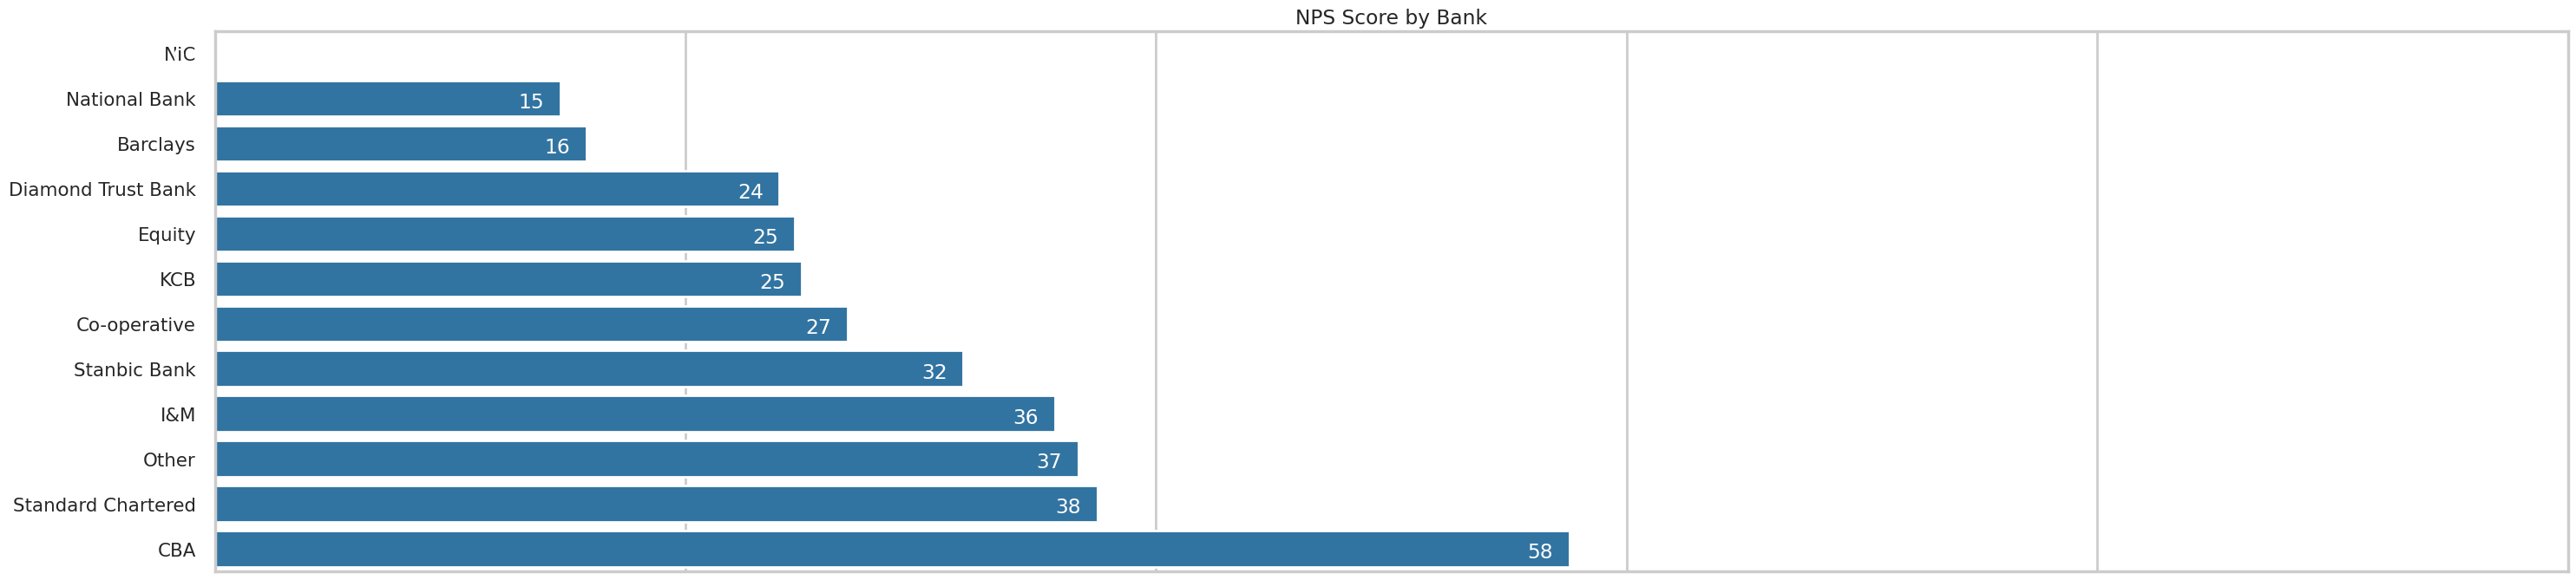

In [ ]:
# Plotting the data above
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 0.7)
f, ax = plt.subplots(figsize=(30,7))

sns.barplot(data = bank_df_sorted,
            x = 'nps_category',
            y='bank',
               ax=ax)
ax.set(ylabel='',xlabel='', title = 'NPS Score by Bank')
ax.set_xlim(0,1)
ax.xaxis.set_major_formatter(plt.NullFormatter())


#data labels
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()*100),
                (p.get_width(), p.get_y()),
                va='center',
                xytext=(-35, -18), #offset points so that the are inside the chart
                textcoords='offset points',
                color = 'white')

plt.tight_layout()
plt.savefig('NPS by Bank.png')
plt.show()

From the findings above, we notice that CBA bank, standard chartered and I&M bank had the highest NPS scores, with scores of 58, 38 and 36 respectively.

**NPS Score by Bank and Week**

In [ ]:
# Calculating the NPS score by bank and week
bankw_df = feedback.groupby(['bank', 'week'])['nps_category'].apply(lambda x: (x.str.contains('promoter').sum() - x.str.contains('detractor').sum()) / (x.str.contains('promoter').sum() + x.str.contains('passive').sum() + x.str.contains('detractor').sum())).reset_index()

bankw_df_sorted = bankw_df.sort_values(by='nps_category', ascending=True)
bankw_df_sorted

,bank,week,nps_category
11,I&M,31,-1.000000
1,Barclays,31,0.000000
14,NIC,30,0.000000
5,Co-operative,31,0.045455
18,Other,31,0.100000
15,National Bank,30,0.141509
0,Barclays,30,0.162162
6,Diamond Trust Bank,30,0.208333
13,KCB,31,0.218750
8,Equity,30,0.244615


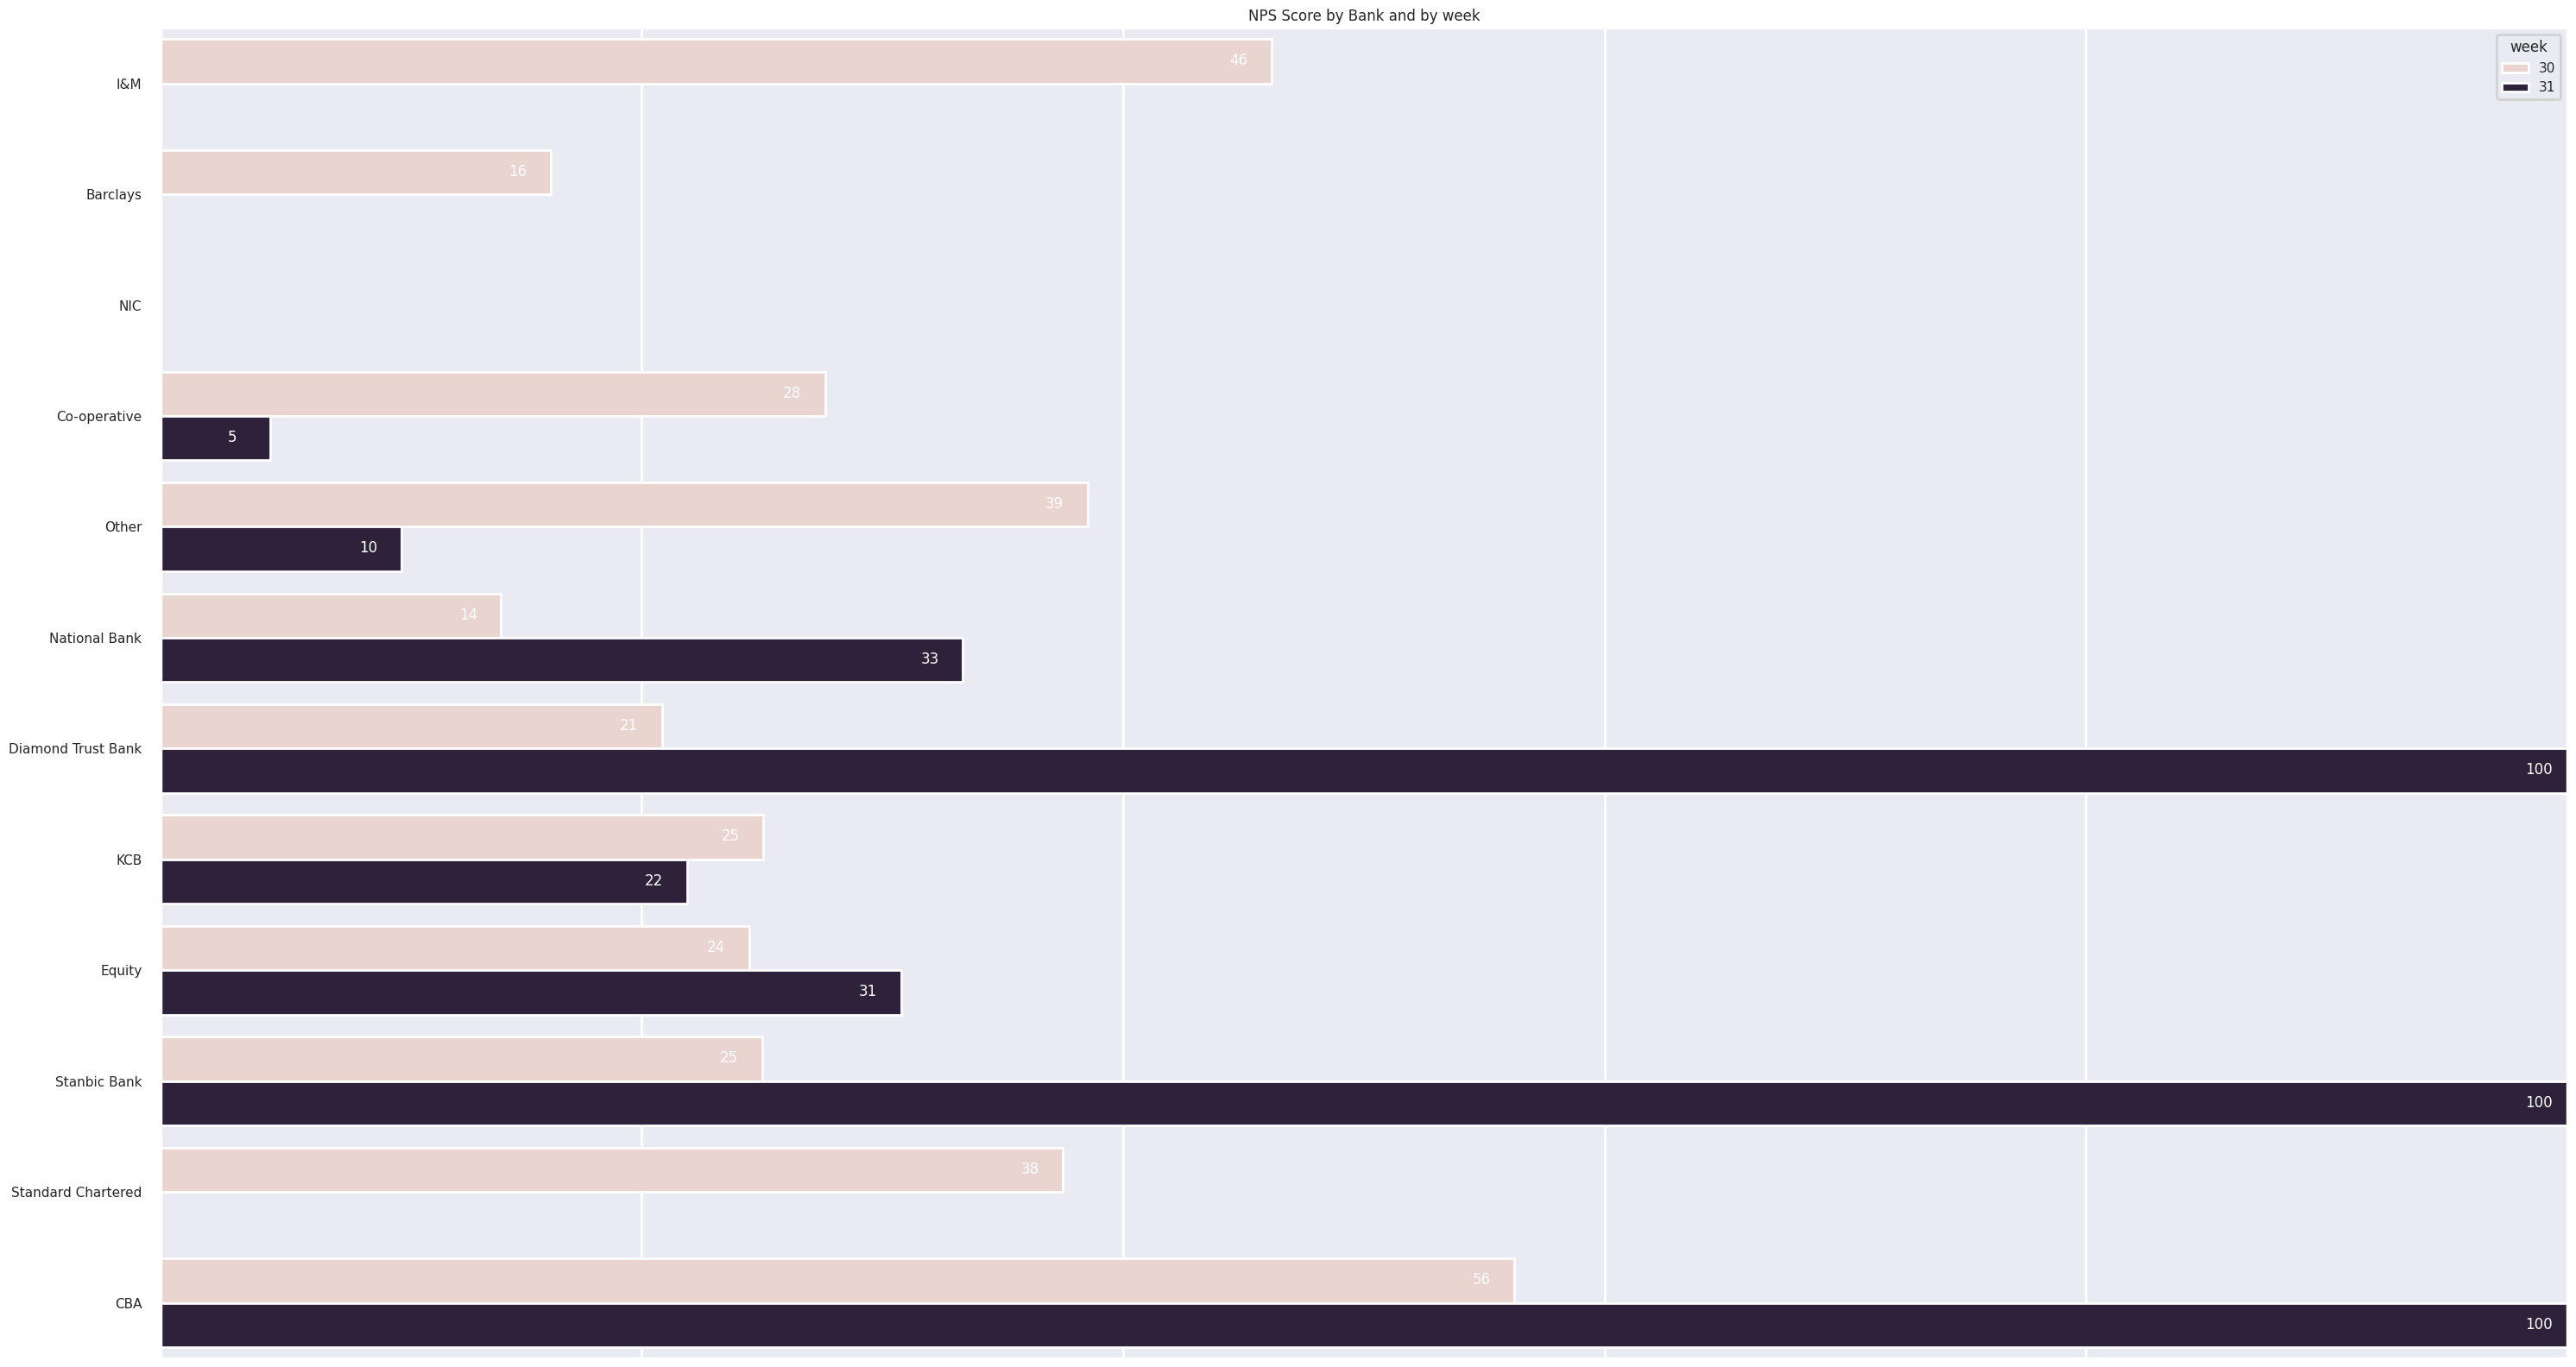

In [ ]:
# Plotting
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = 0.5)
f, ax = plt.subplots(figsize=(30,16))

sns.barplot(data = bankw_df_sorted,
            x = 'nps_category',
            y='bank',
            hue='week',
               ax=ax)
ax.set(ylabel='',xlabel='', title = 'NPS Score by Bank and by week')
ax.set_xlim(0,1)
ax.xaxis.set_major_formatter(plt.NullFormatter())


#data labels
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()*100),
                (p.get_width(), p.get_y()),
                va='center',
                xytext=(-35, -18), #offset points so that the are inside the chart
                textcoords='offset points',
                color = 'white')

plt.tight_layout()
plt.savefig('NPS by Bank.png')
plt.show()

From the barplot above, we notice that NIC bank had an NPS score of 0. In terms of correlation of banks with the week, we notice that in week 31 there is more customer activity than in week 30. This is particularly emphasized in CBA, Stanbic and DTB banks, whose NPS score varies greatly by week. I&M and Barclays banks register no activity in week 31.

## 2. Does the Net Promoter Score vary significantly across touchpoints/interaction channels?

In [ ]:
# Finding the unique values in the last_interaction_with_bank column
feedback["last_interaction_with_bank"].value_counts(dropna=False)

Mobile banking                      1107
ATM                                  977
Teller or Branch transactions        750
Bank agent/ agency banking           484
Customer service desk/ enquiries     167
Internet banking                      65
Social media                          28
Other                                 28
Call centre                           18
Insurance                              8
Name: last_interaction_with_bank, dtype: int64

In [ ]:
# Calculating the NPS across touchpoints
touchpoint_df = feedback.groupby(['last_interaction_with_bank'])['nps_category'].apply(lambda x: (x.str.contains('promoter').sum() - x.str.contains('detractor').sum()) / (x.str.contains('promoter').sum() + x.str.contains('passive').sum() + x.str.contains('detractor').sum())).reset_index()

touchpoint_df_sorted = touchpoint_df.sort_values(by='nps_category', ascending=True)
touchpoint_df_sorted

,last_interaction_with_bank,nps_category
4,Insurance,-0.500000
9,Teller or Branch transactions,0.138667
2,Call centre,0.166667
8,Social media,0.178571
7,Other,0.214286
1,Bank agent/ agency banking,0.227273
0,ATM,0.270215
6,Mobile banking,0.322493
3,Customer service desk/ enquiries,0.359281
5,Internet banking,0.415385


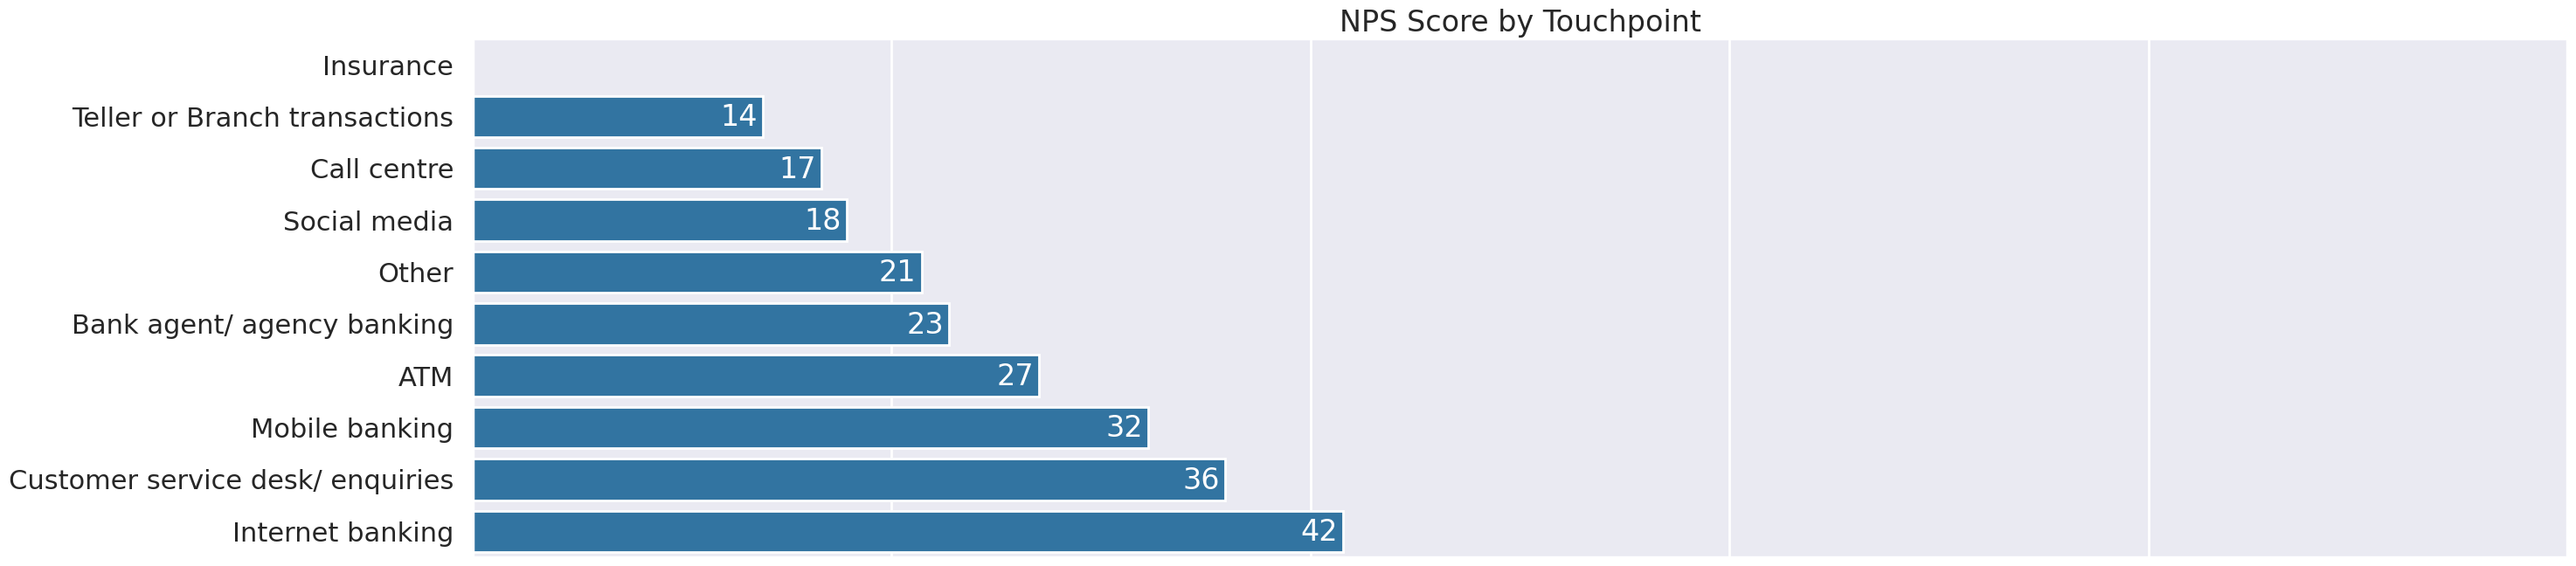

In [ ]:
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(30,7))

sns.barplot(data = touchpoint_df_sorted,
            x = 'nps_category',
            y='last_interaction_with_bank',

               ax=ax)
ax.set(ylabel='',xlabel='', title = 'NPS Score by Touchpoint')
ax.set_xlim(0,1)
ax.xaxis.set_major_formatter(plt.NullFormatter())

#data labels
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()*100),
                (p.get_width(), p.get_y()),
                va='center',
                xytext=(-35, -18), #offset points so that the are inside the chart
                textcoords='offset points',
                color = 'white')

plt.tight_layout()
plt.savefig('NPS by Touchpoint.png')
plt.show()

From the figure above, we notice that customers that use internet banking are more likely to recommend the company's services than the other interaction channels. Customer dissatisfaction is highest for customers seeking Insurance services, teller and branch transactions and call center services.

## 3. Does the Net Promoter Score vary by Demographic characteristics?

In this case, the demographic characteristics which will be considered are
* gender
* region
* living standards
* education level
* employment
* access to internet
* access to cable TV

We need to write a function for calculating and promoting NPS score for each of the demographic characteristics highlighted above.

In [ ]:
# Function to calculate and plot NPS Score across various demographics
def demographics_nps(column):
  df=feedback[[column,'nps_category']]
  demographic_df = df.groupby(column)['nps_category'].apply(lambda x: (x.str.contains('promoter').sum() - x.str.contains('detractor').sum()) / (x.str.contains('promoter').sum() + x.str.contains('passive').sum() + x.str.contains('detractor').sum())).reset_index()
  demographic_df_sorted = demographic_df.sort_values(by='nps_category', ascending=True)

  sns.set_style("darkgrid")
  sns.set_context("poster", font_scale = 0.7)
  f, ax = plt.subplots(figsize=(30,10))

  sns.barplot(data = demographic_df_sorted,
            x = 'nps_category',
            y=column,

               ax=ax)
  ax.set(ylabel='',xlabel='', title = 'NPS Score by '+ str(column))
  ax.set_xlim(0,1)
  ax.xaxis.set_major_formatter(plt.NullFormatter())

  #data labels
  for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()*100),
                (p.get_width(), p.get_y()),
                va='center',
                xytext=(-35, -18), #offset points so that the are inside the chart
                textcoords='offset points',
                color = 'white')

  plt.tight_layout()
  #plt.savefig('NPS by Touchpoint.png')



  return plt.show()

### **Gender**

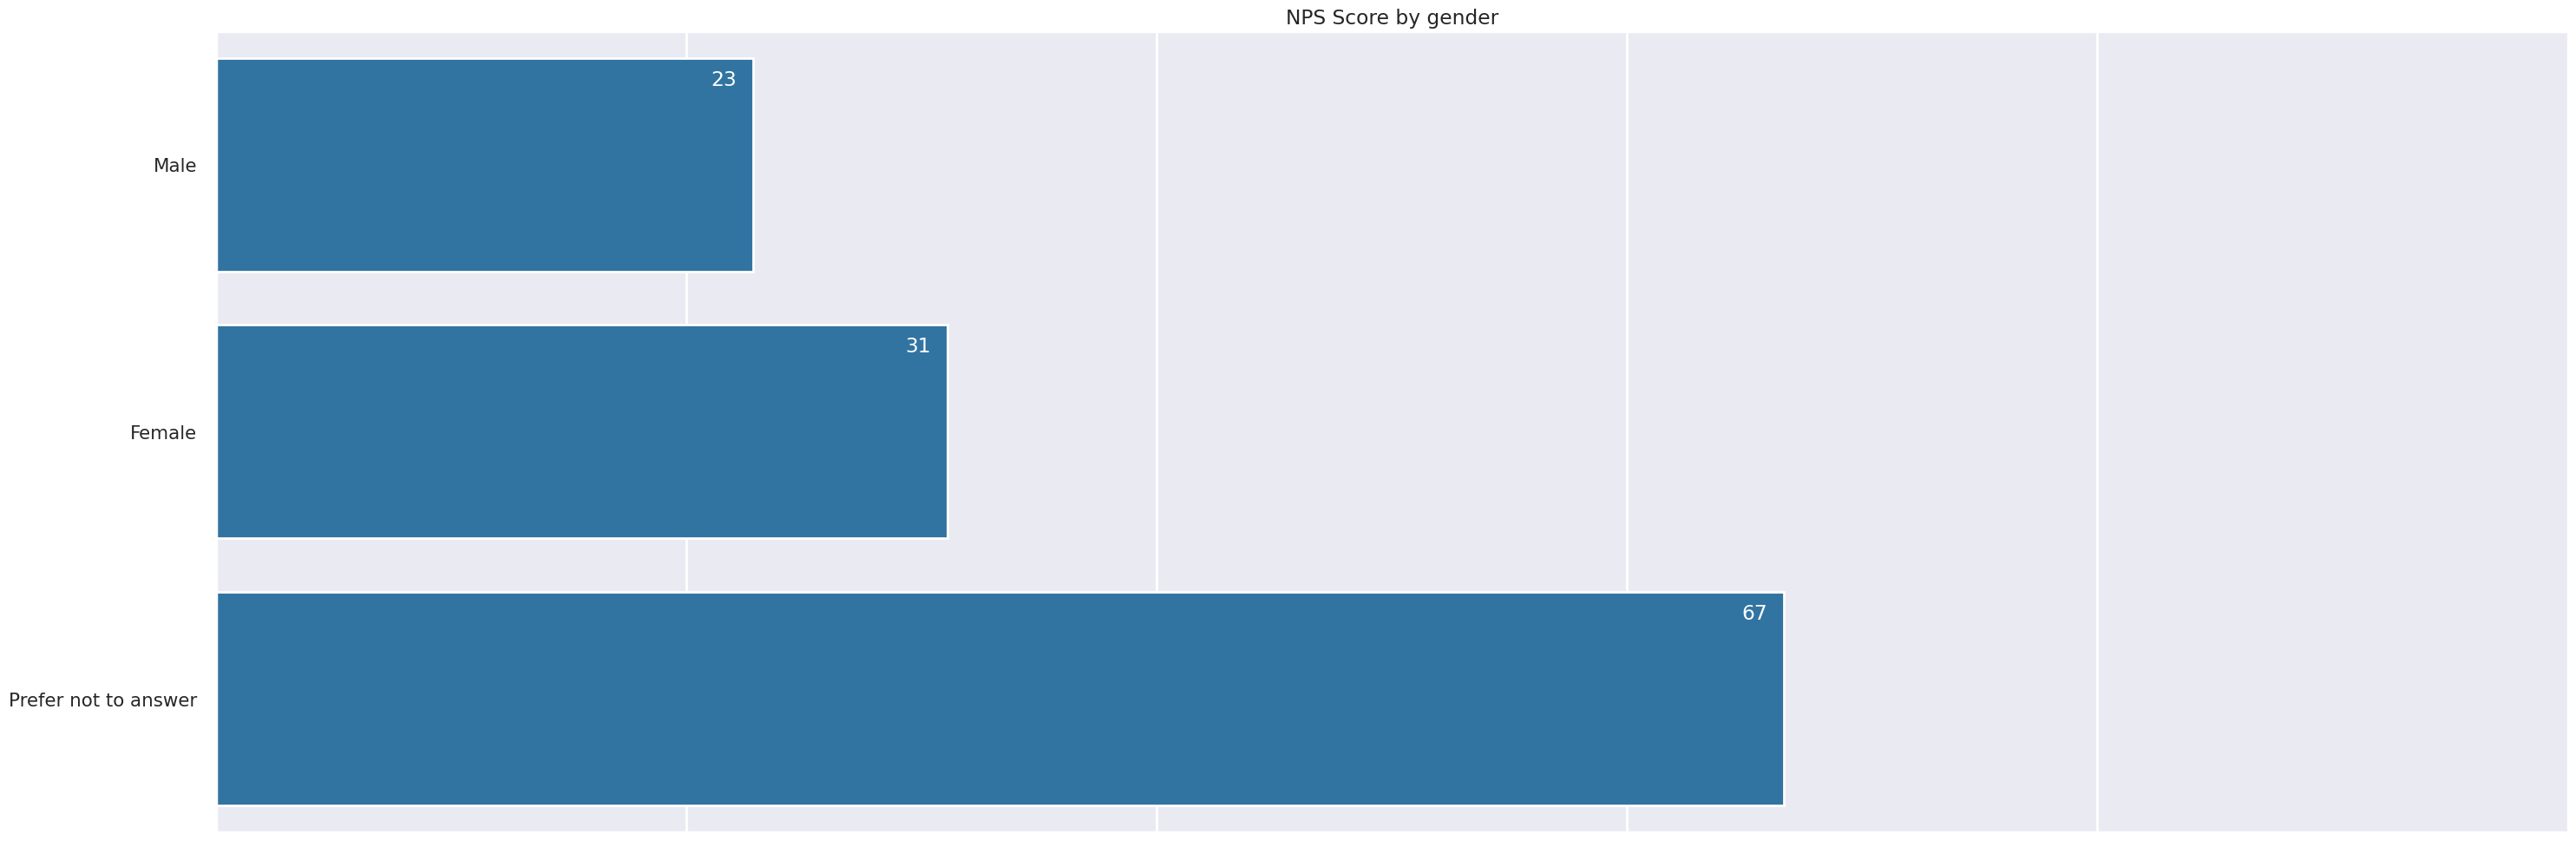

In [ ]:
demographics_nps('gender')

The customers that preferred to conceal their gender were most likely to recommend the services. Customer feedback should be targeted towards males, whose low NPS score are an indication of dissatisfaction with the services offered.

### **Region**

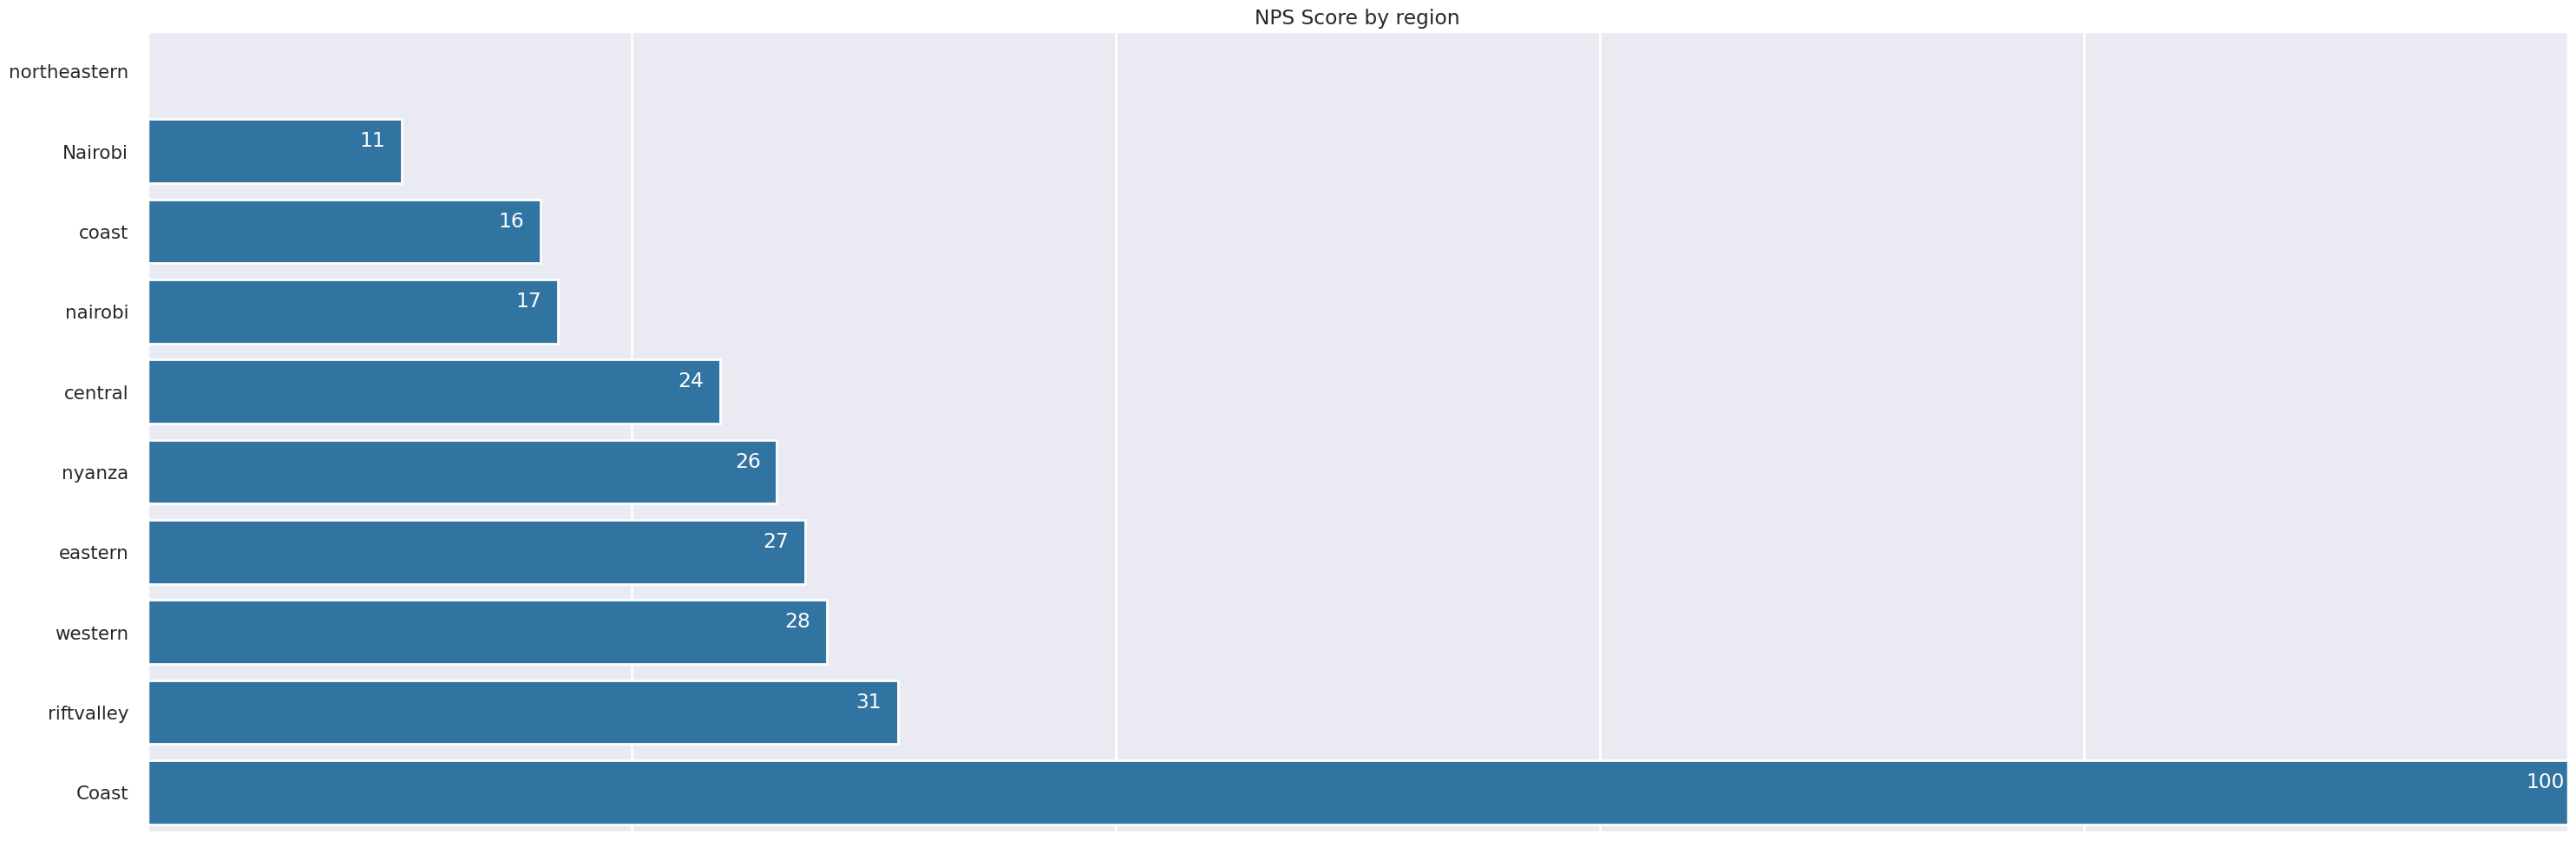

In [ ]:
demographics_nps('region')

Again, in terms of region, there is a great variation, with the coast region having marginally higher NPS as compared to the other regions. The high NPS score could be an indication that there was insufficient data from the region, hence outliers, or a high customer satisfaction due to the services offered. The absence of NPS in the northeastern region is an indication of lack of penetration of the services to this region.

### **Living Standards**

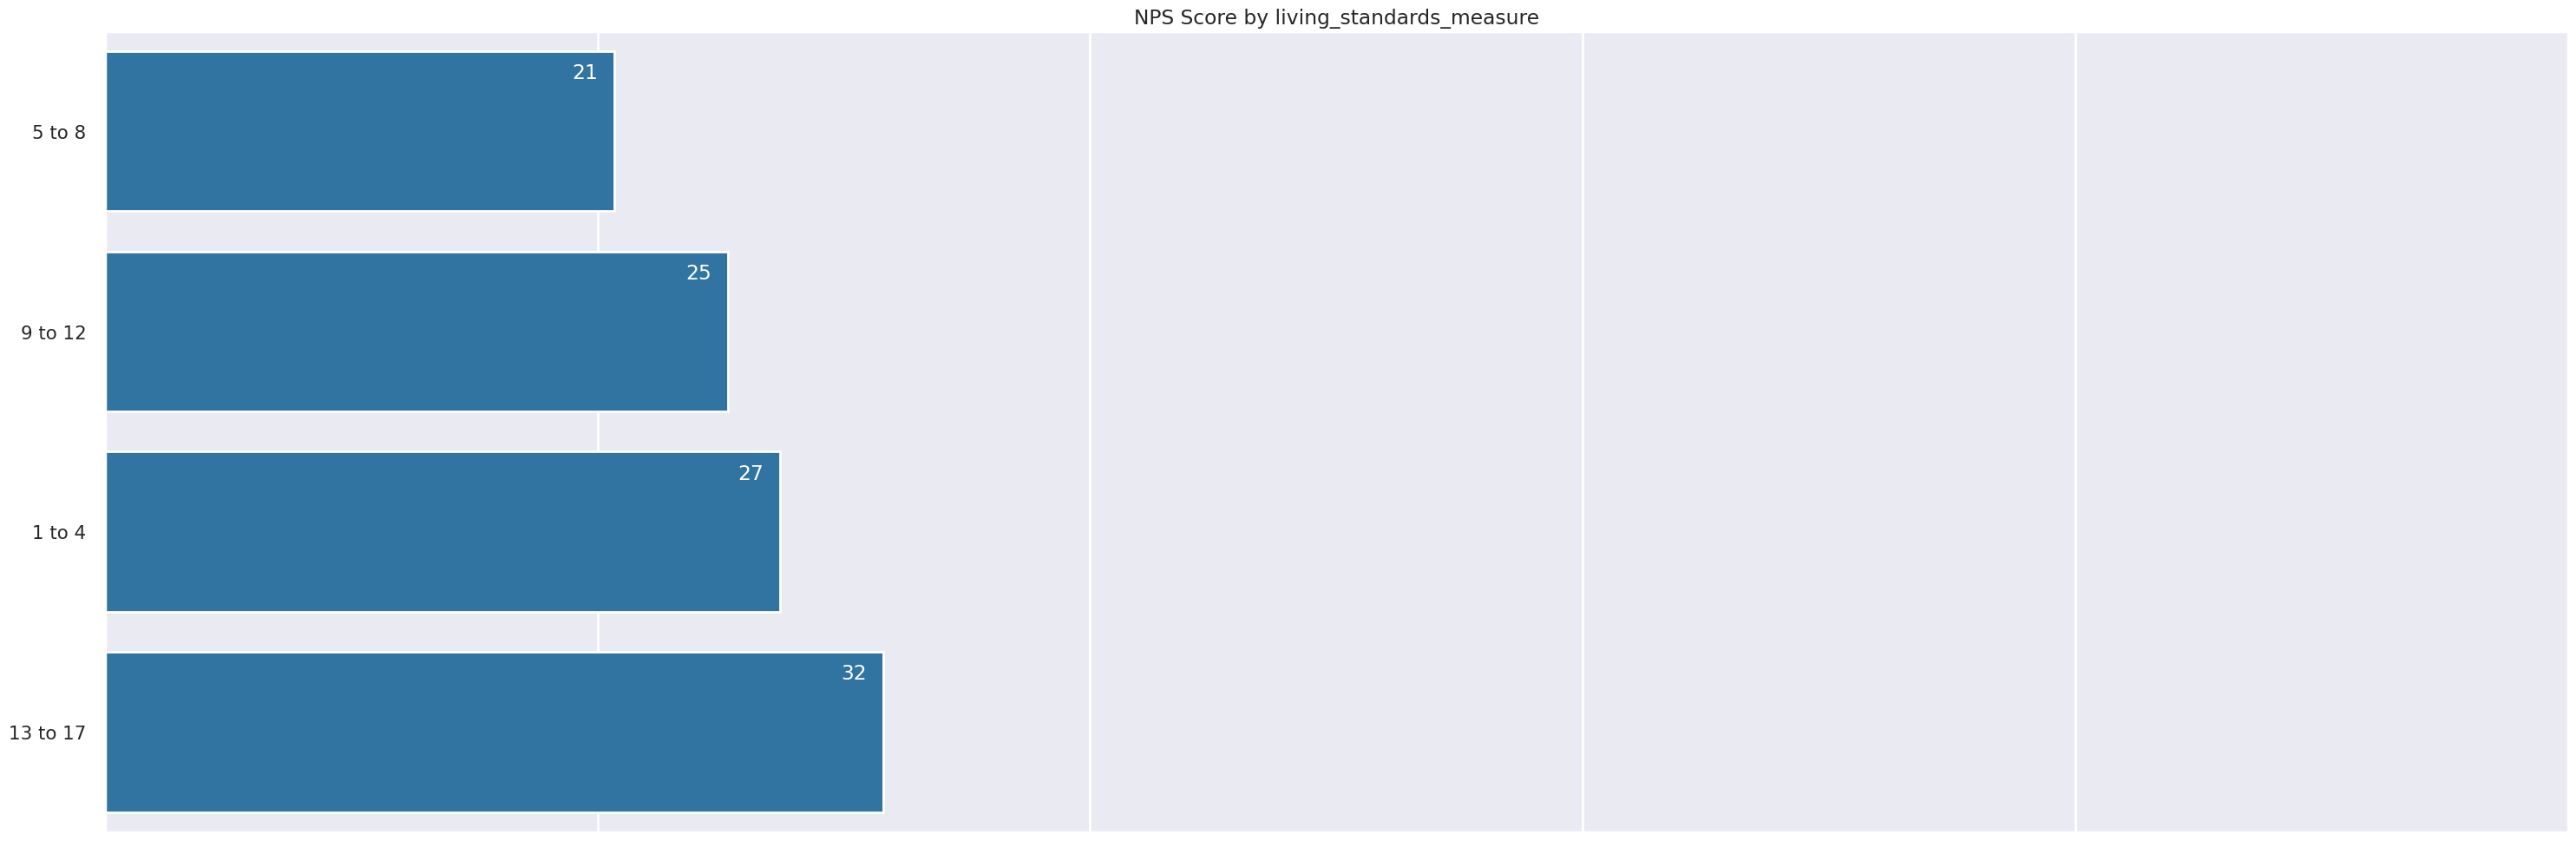

In [ ]:
demographics_nps('living_standards_measure')

Depending on what the various classes of living represent, we see a minimal variation in NPS in this demographic as compared to the others so far.

### **Education Level**

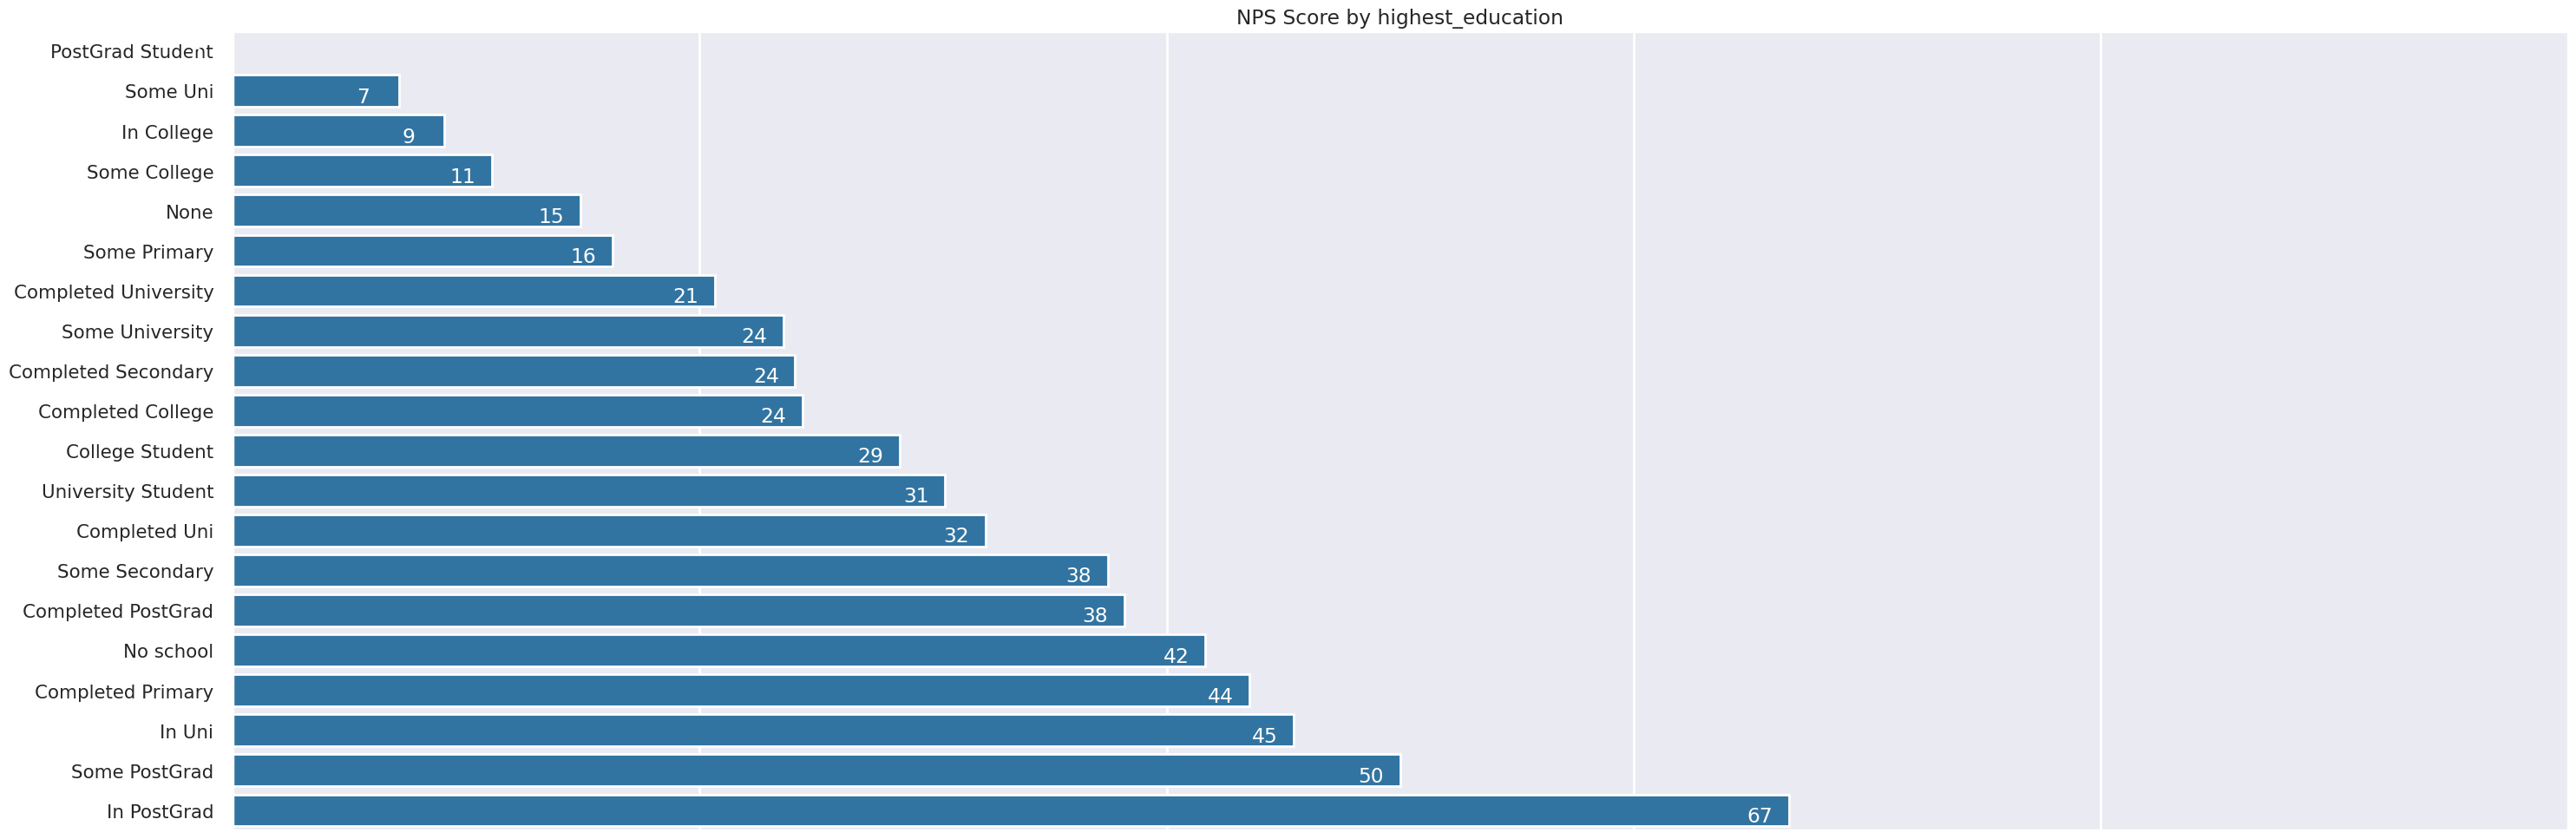

In [ ]:
demographics_nps('highest_education')

The NPS for this demographic do not reveal a clear correlation of the education levels with customer satisfaction. We cannot tell whether a higher or lower level of education is linked to high NPS scores.

### **Employment**

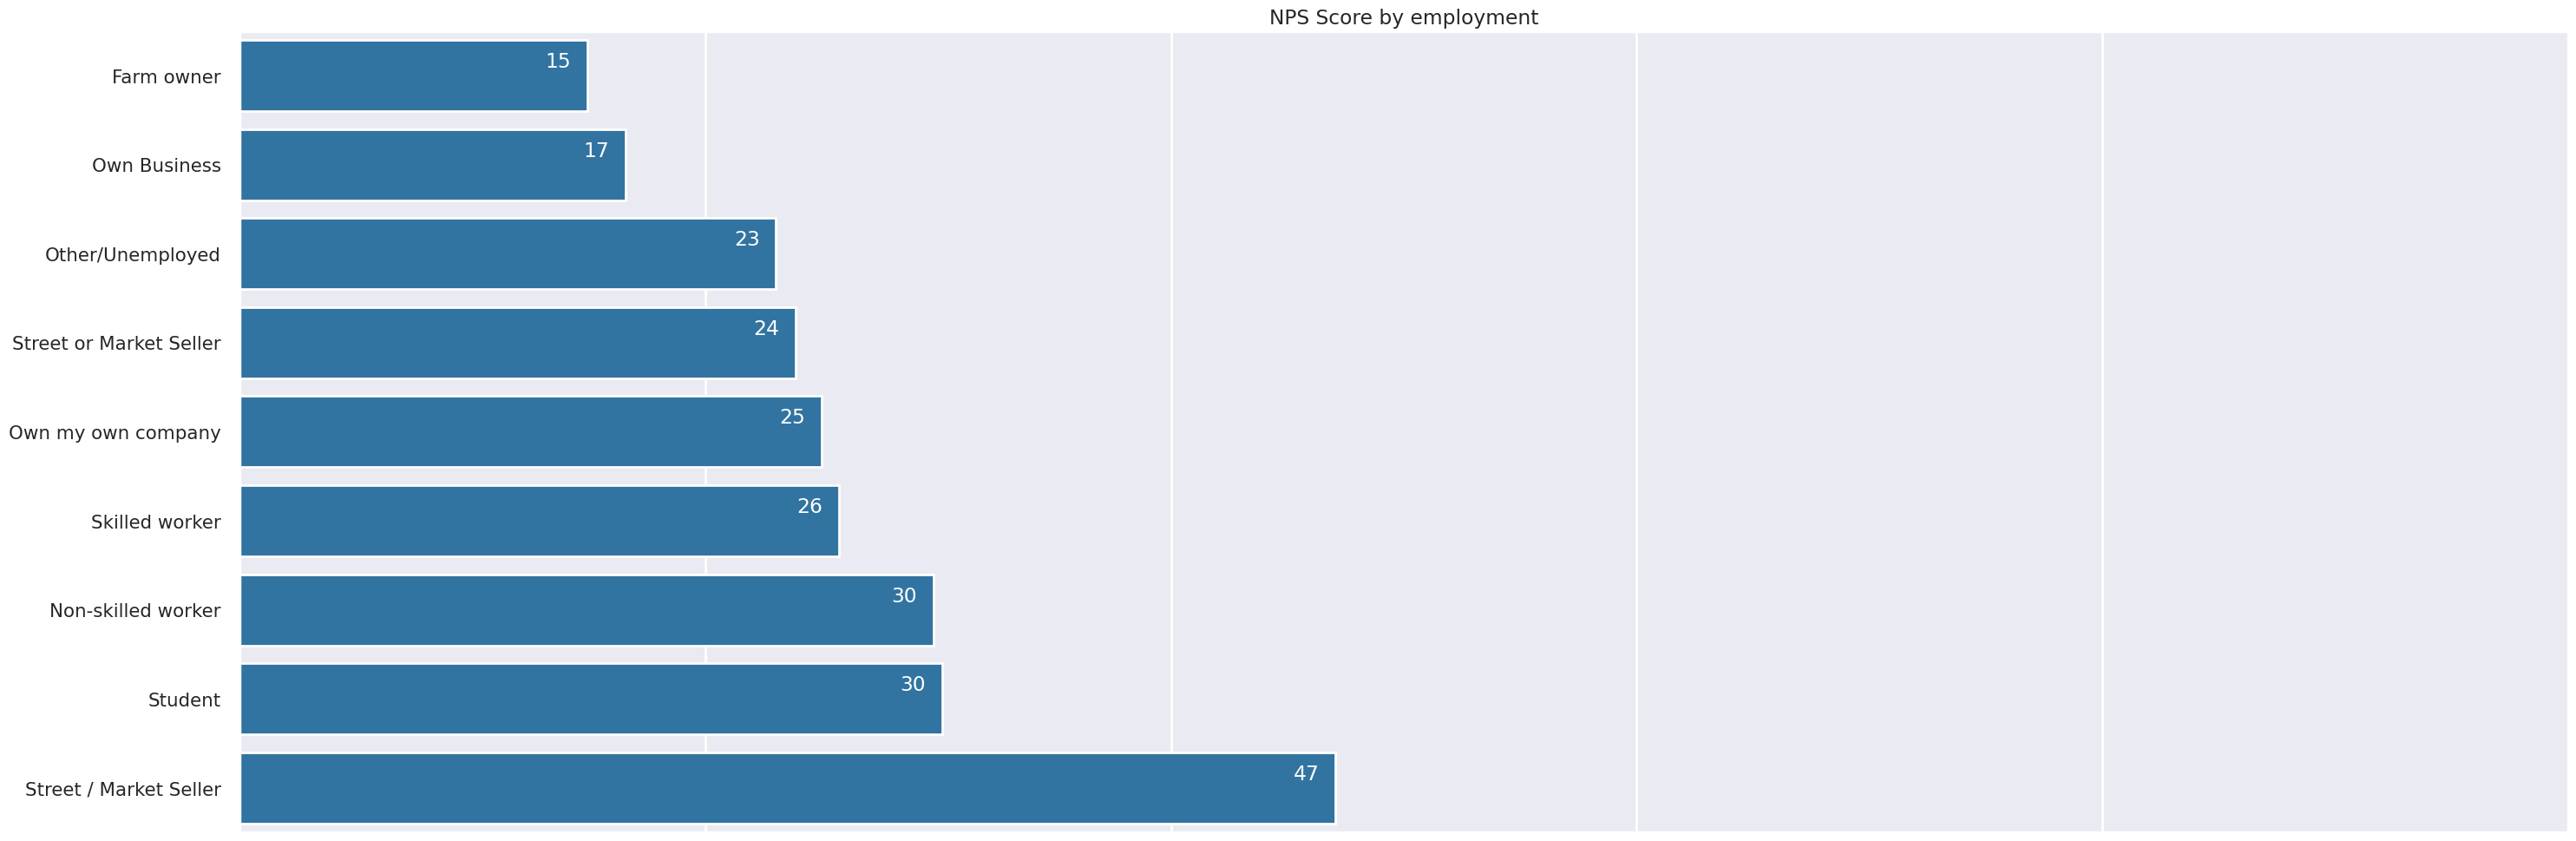

In [ ]:
demographics_nps('employment')

In terms of employment, Street sellers, students and non-skilled workers have the highest NPS.

###**Access to Internet**

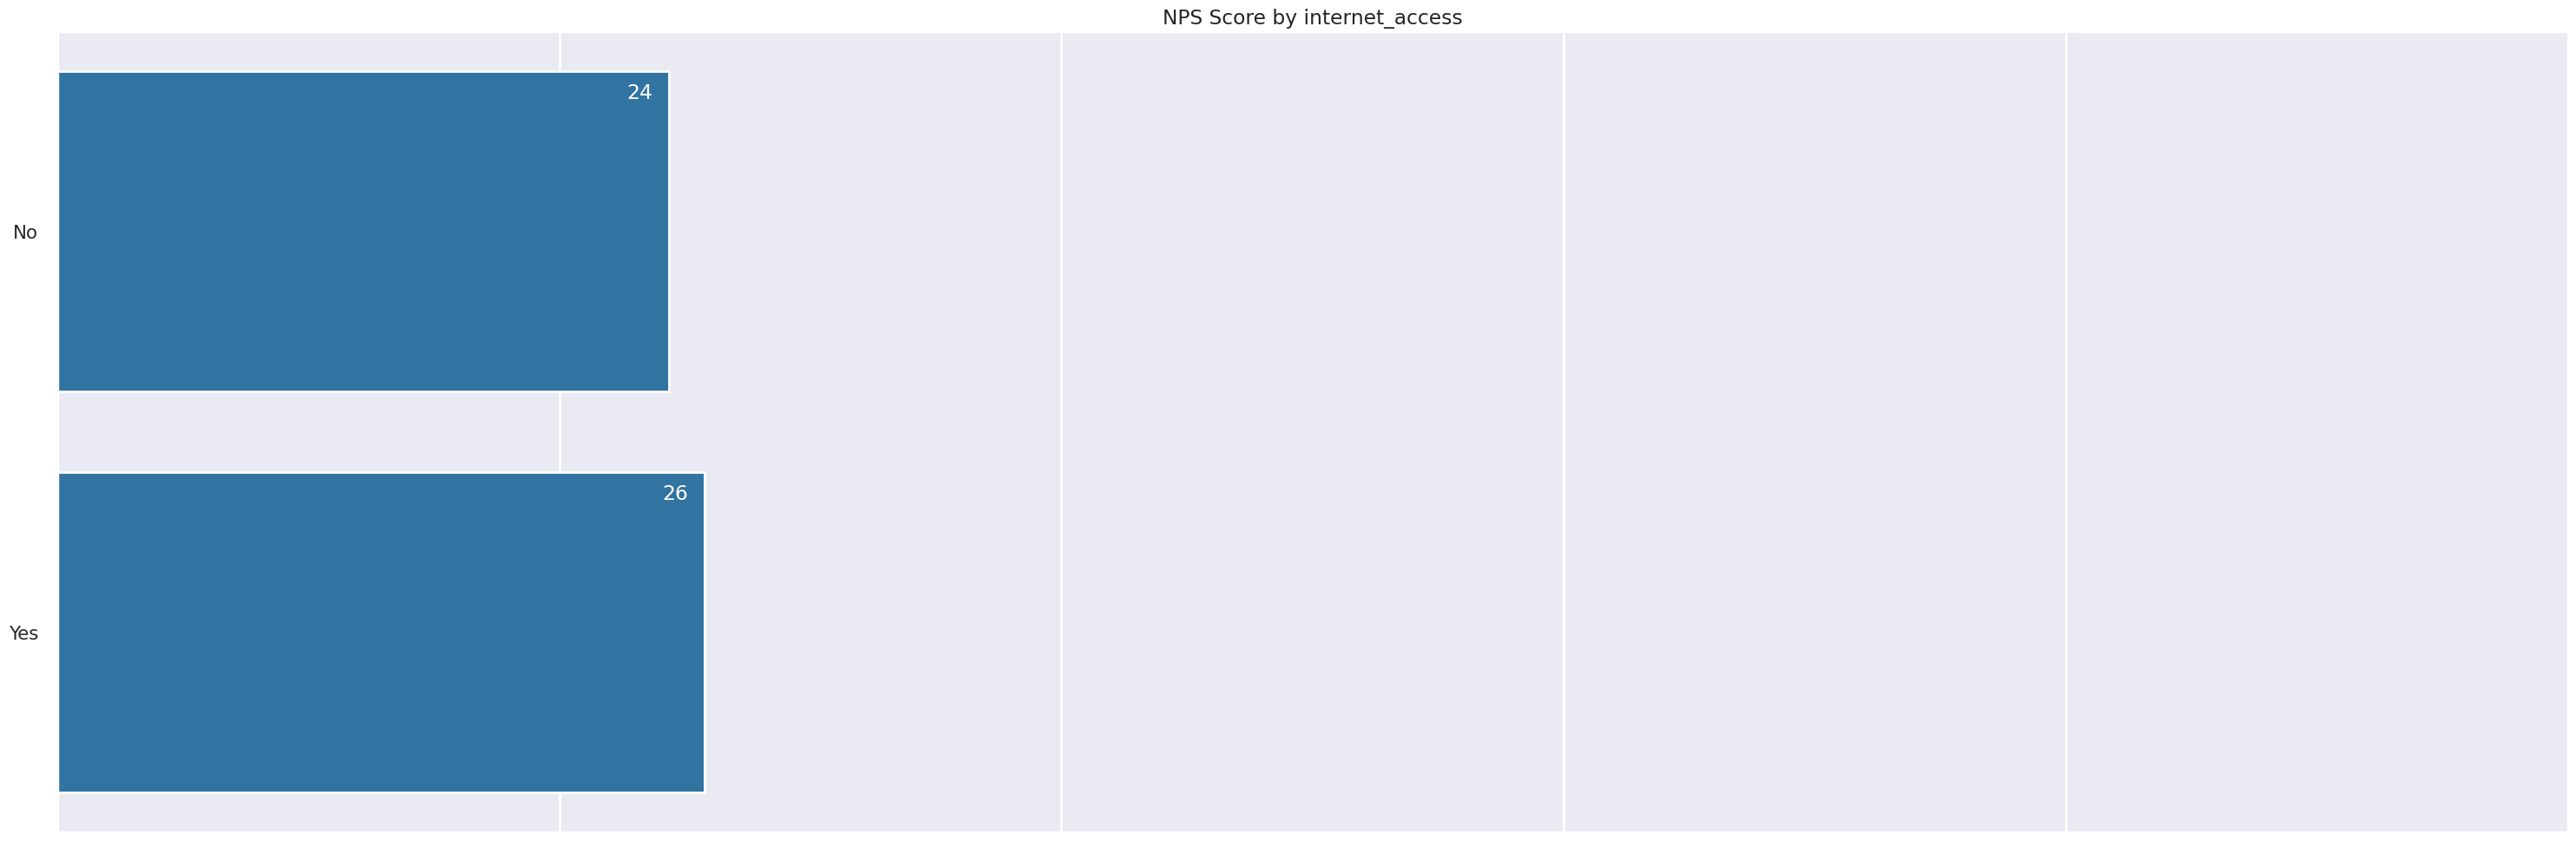

In [ ]:
demographics_nps('internet_access')

People with internet access are slightly more likely to recommend the services than those with no internet access.

###**Access to Cable TV**

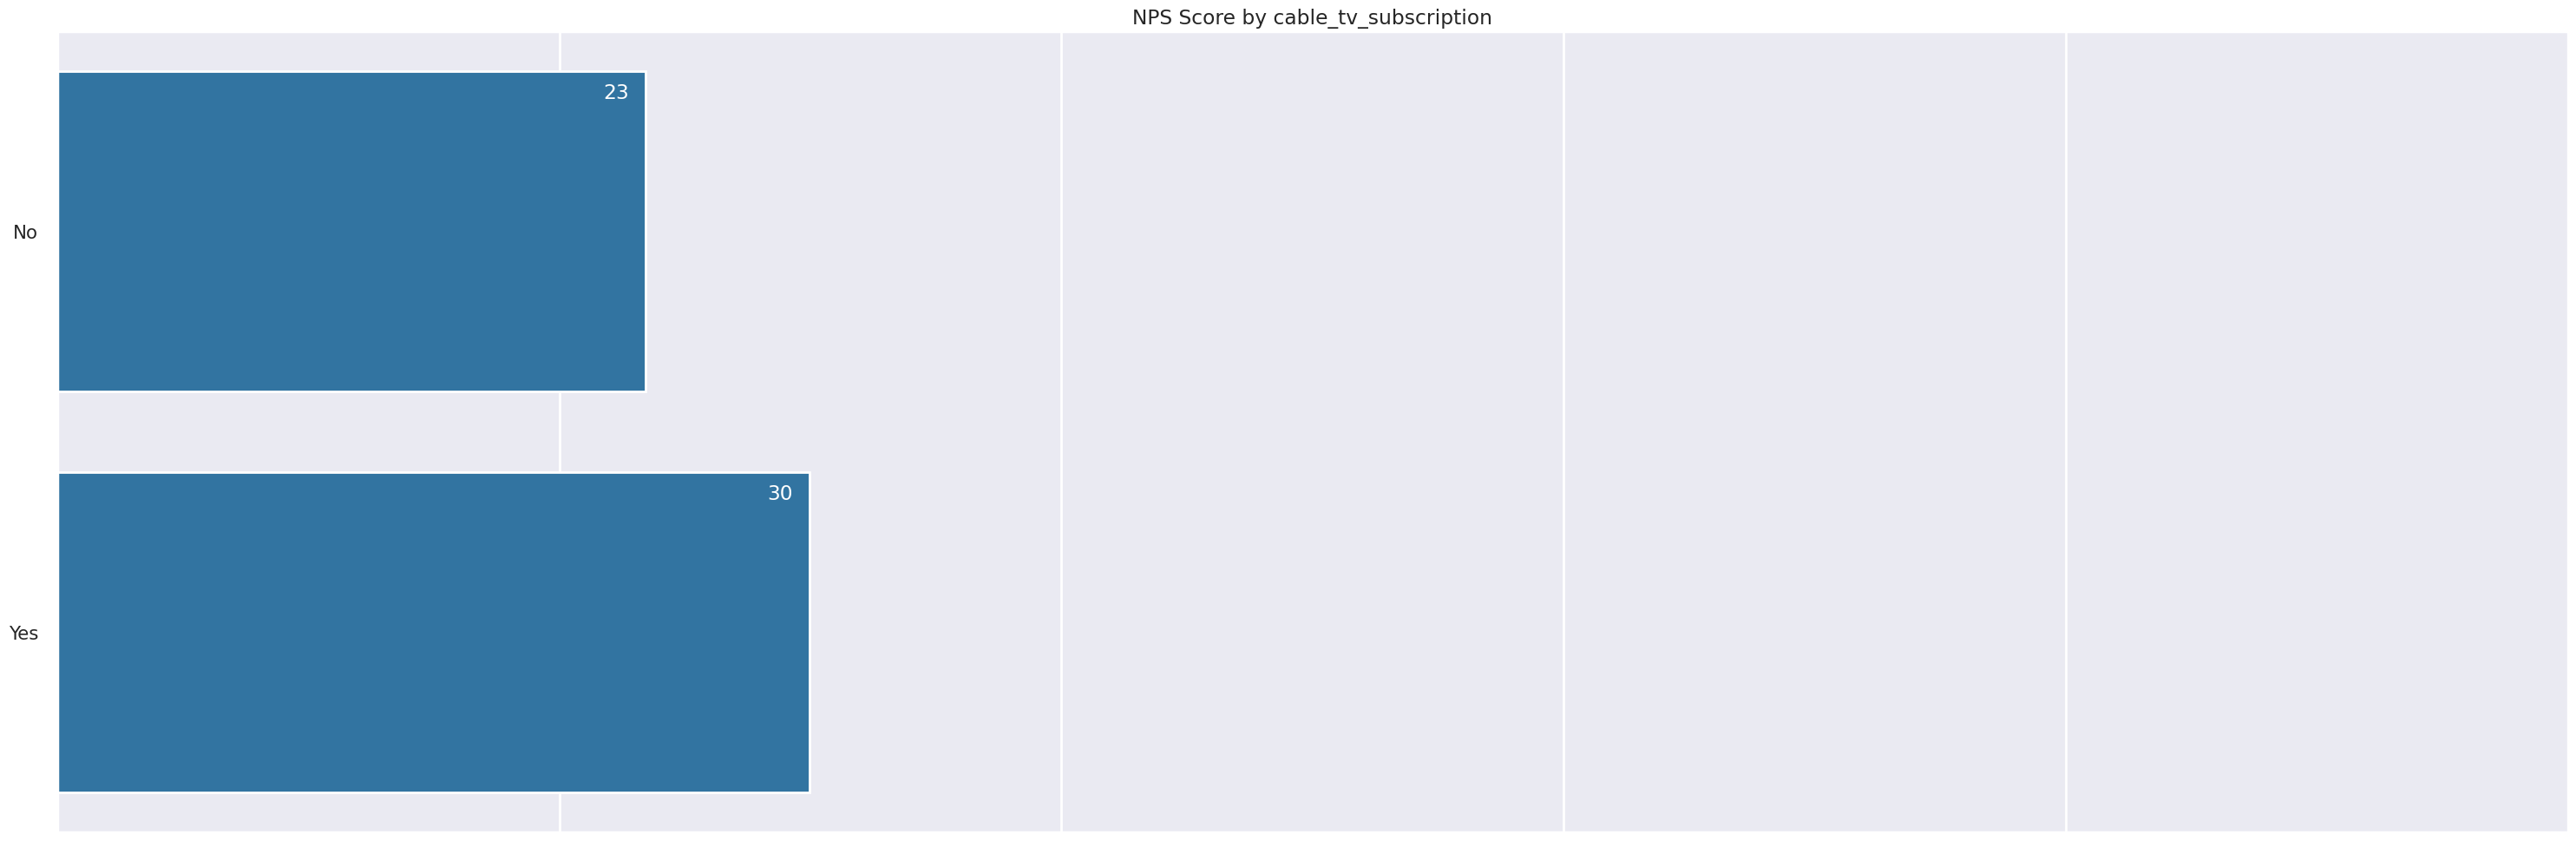

In [ ]:
demographics_nps('cable_tv_subscription')

A similar pattern, as that of "access to internet" noted here

## 4. Does the Response rate* vary significantly across any of the characteristics (Customer Demographics, Bank, Touchpoints, Week, Time of Day)?

We shall create a function for calculating and visualizing how the response rate varies across the characteristics. We shall use a few demographic characteristics as well as the others provided to test the variability. Since we dropped blank rows from the "likelihood to recommend" column, we are sure that the remaining data encompasses all the clients that gave a response to the question.

In [ ]:
# Function to calculate Response Rate across various characteristics. we shall use a simple horizontal bar plot to visualize this
def response_rate(column):
  df = feedback.groupby(column)["likelihood_to_recommend"].sum().sort_values()
  df.plot(kind="barh", fontsize=20, figsize=(15, 10))


### **Demographics**

**Gender**

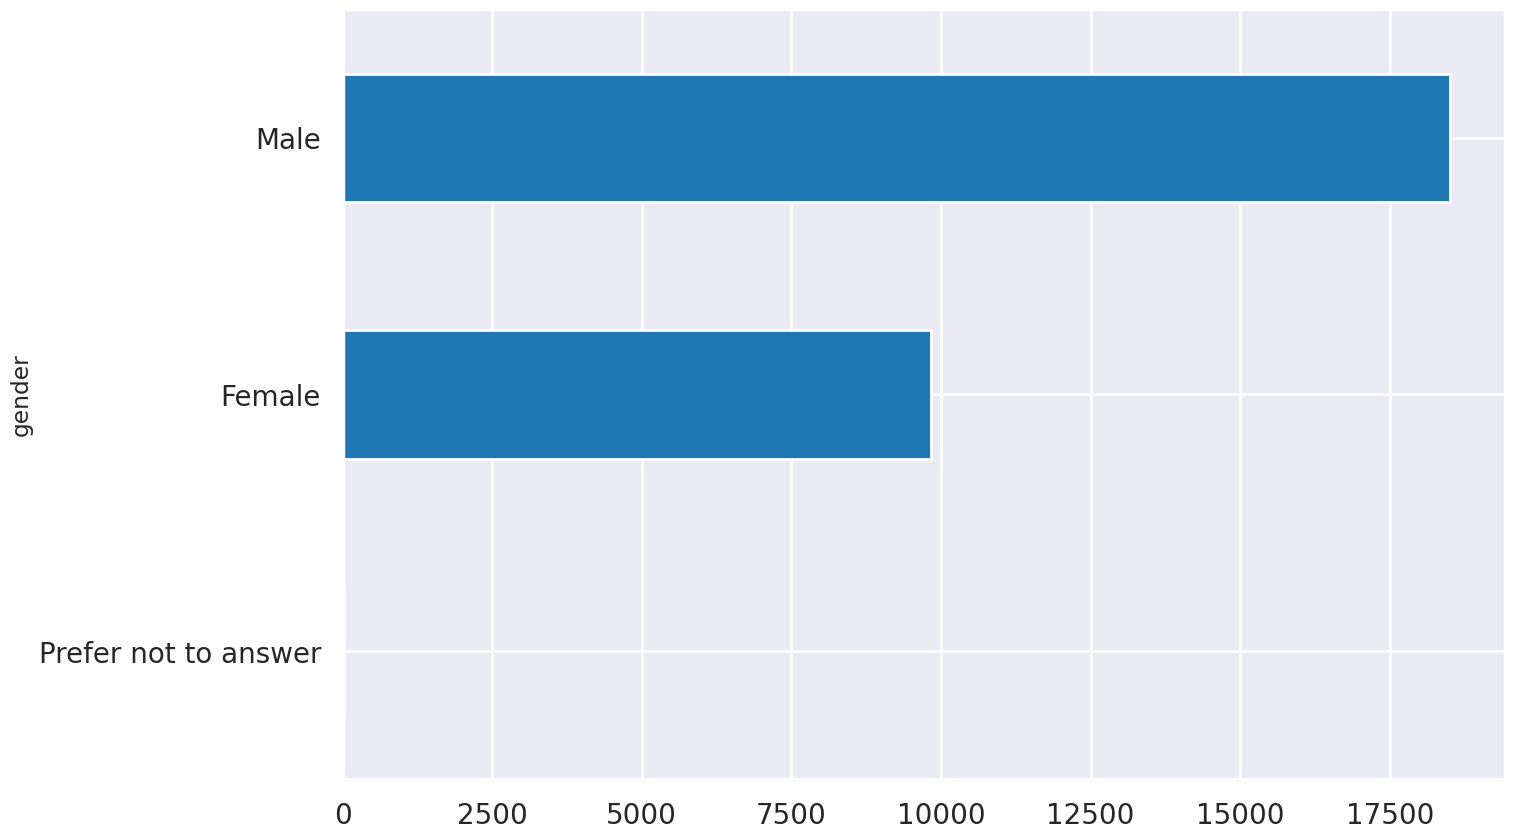

In [ ]:
response_rate('gender')

**Employment**

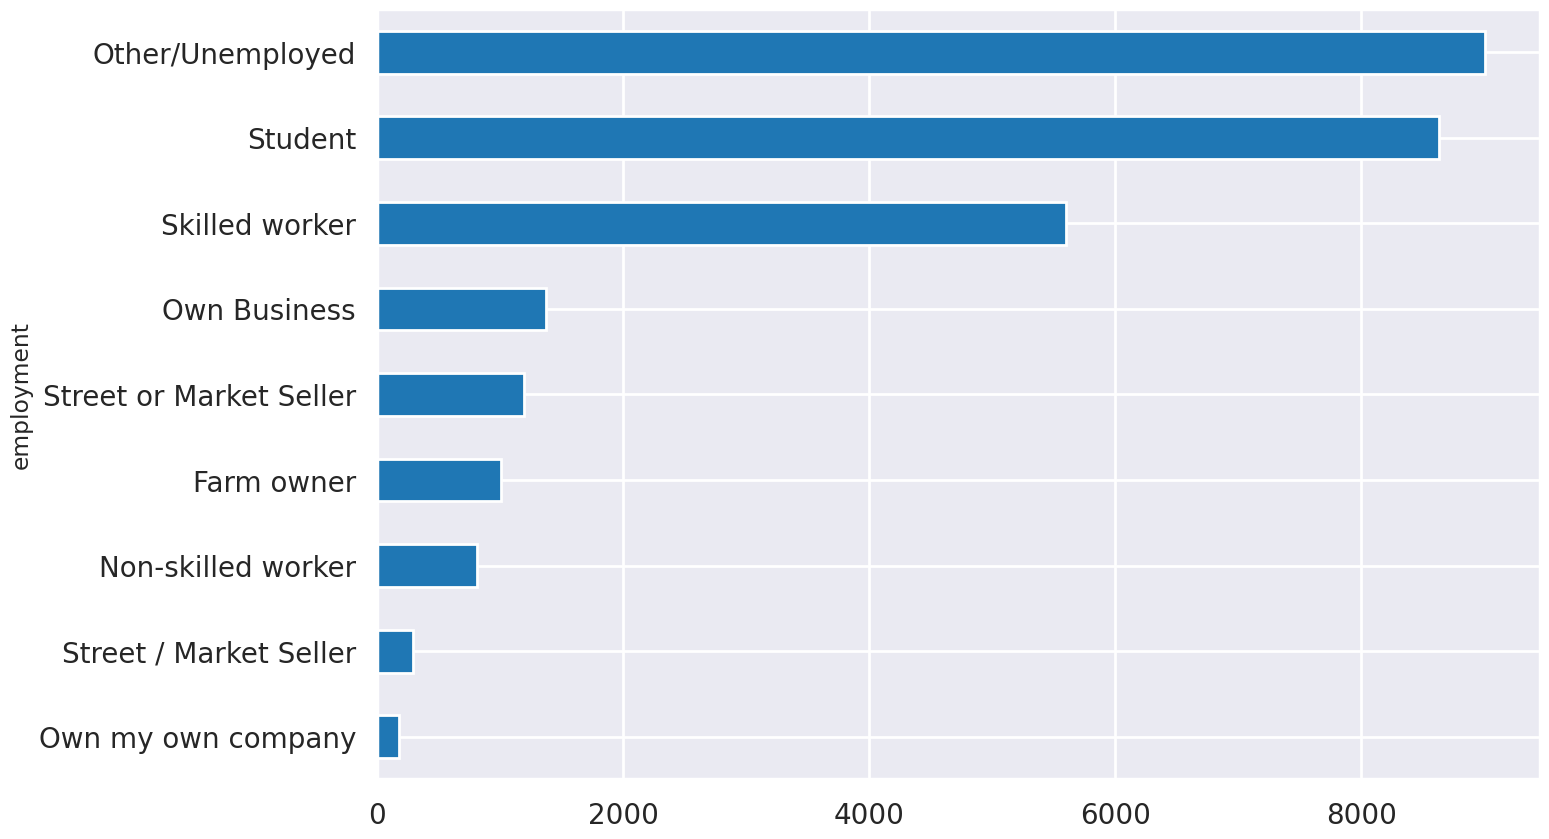

In [ ]:
response_rate('employment')

**Highest Education**

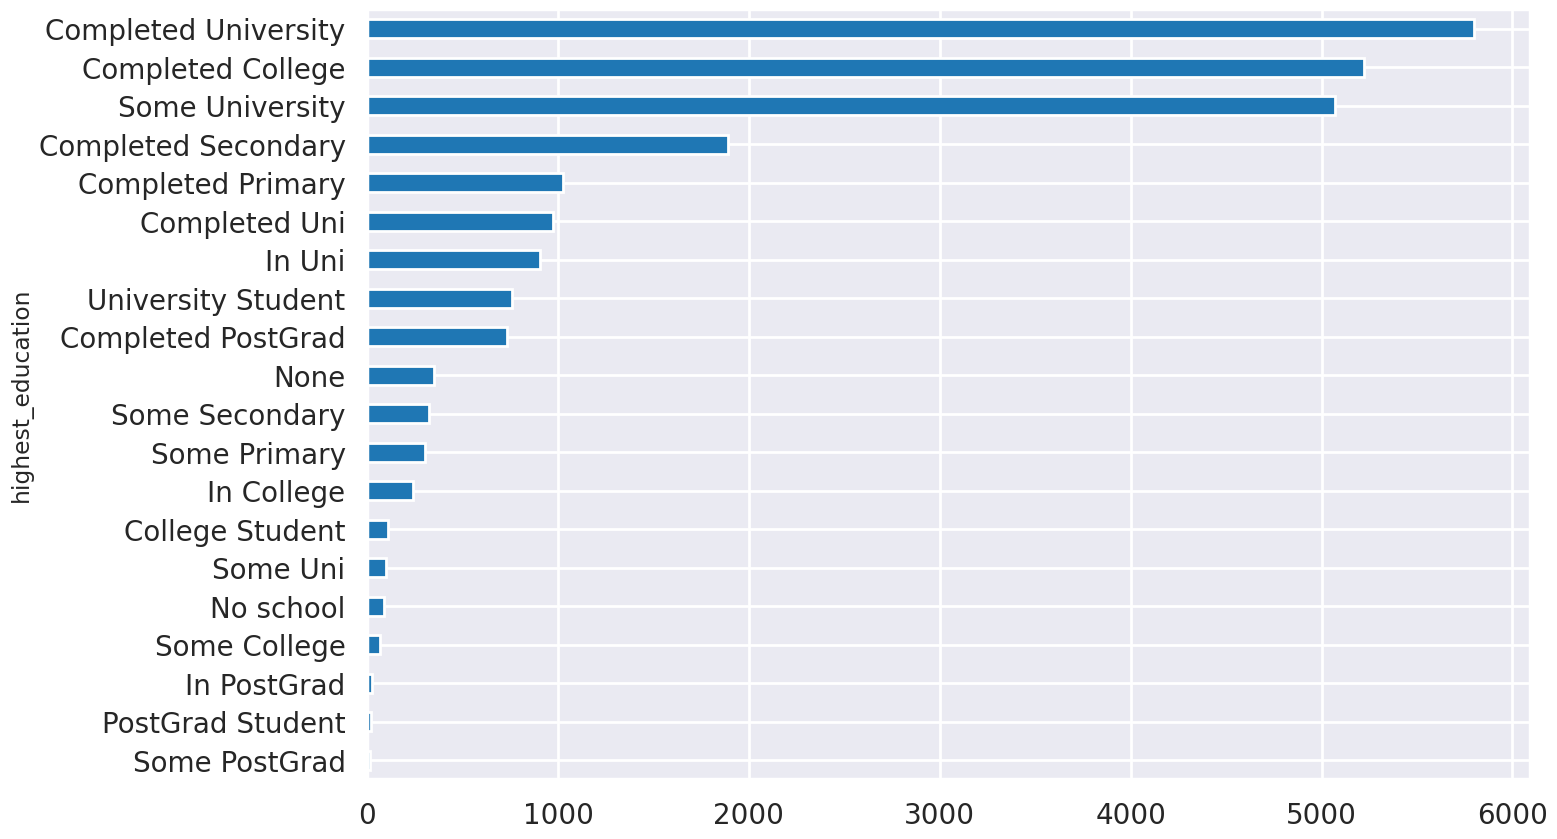

In [ ]:
response_rate('highest_education')

Based on the gender, employment and highest education level, we can conclude that the response rate varies widely. For gender, more males are likely to respond as compared to females. In terms of education, people that have completed some form of education are more likely to respond.

###**Bank**

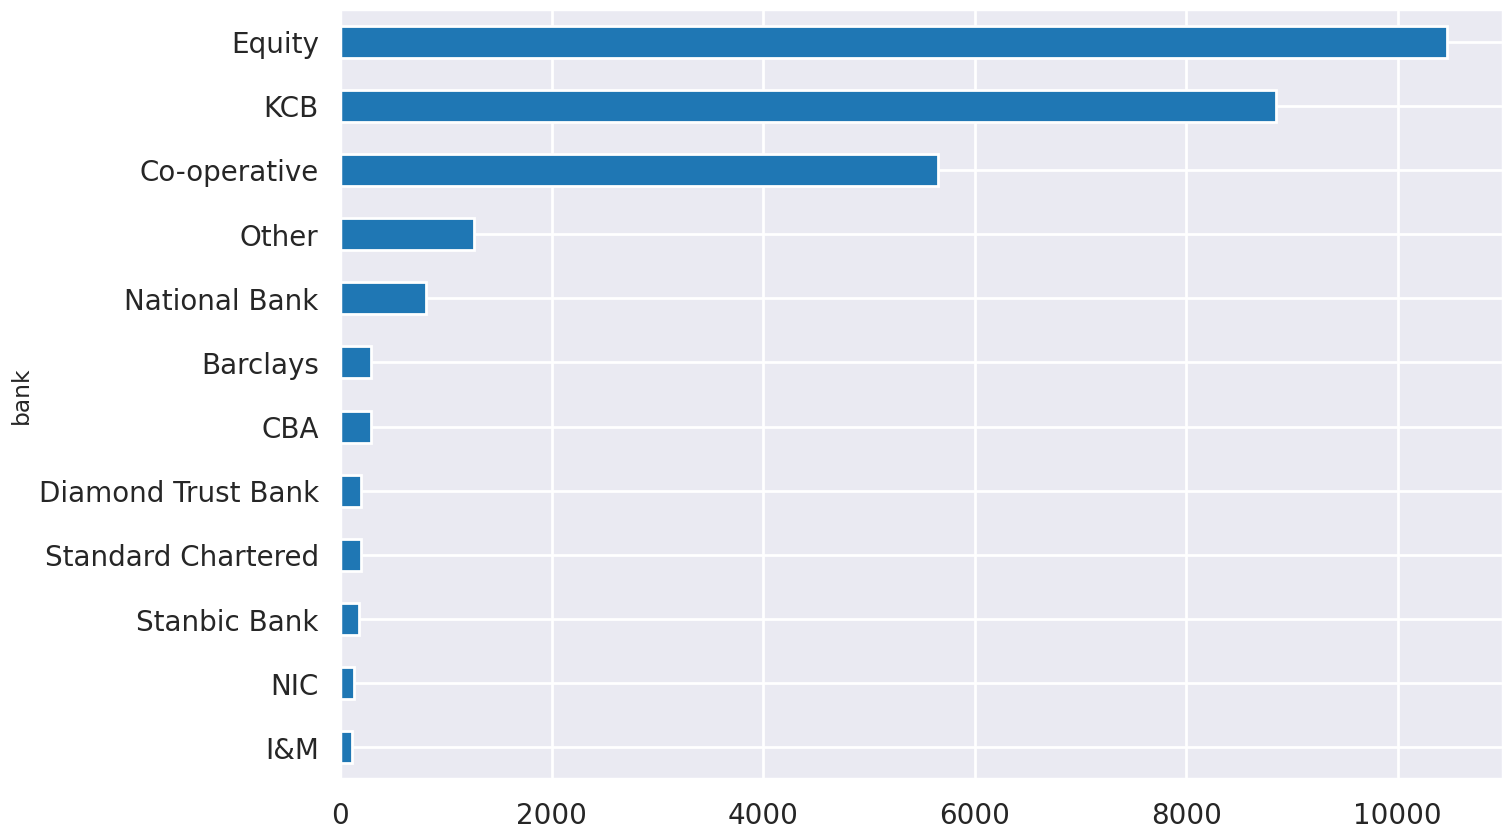

In [ ]:
response_rate('bank')

Consumers from the most popular Kenyan banks had a higher response rate than those from other banks.

###**Touchpoints**

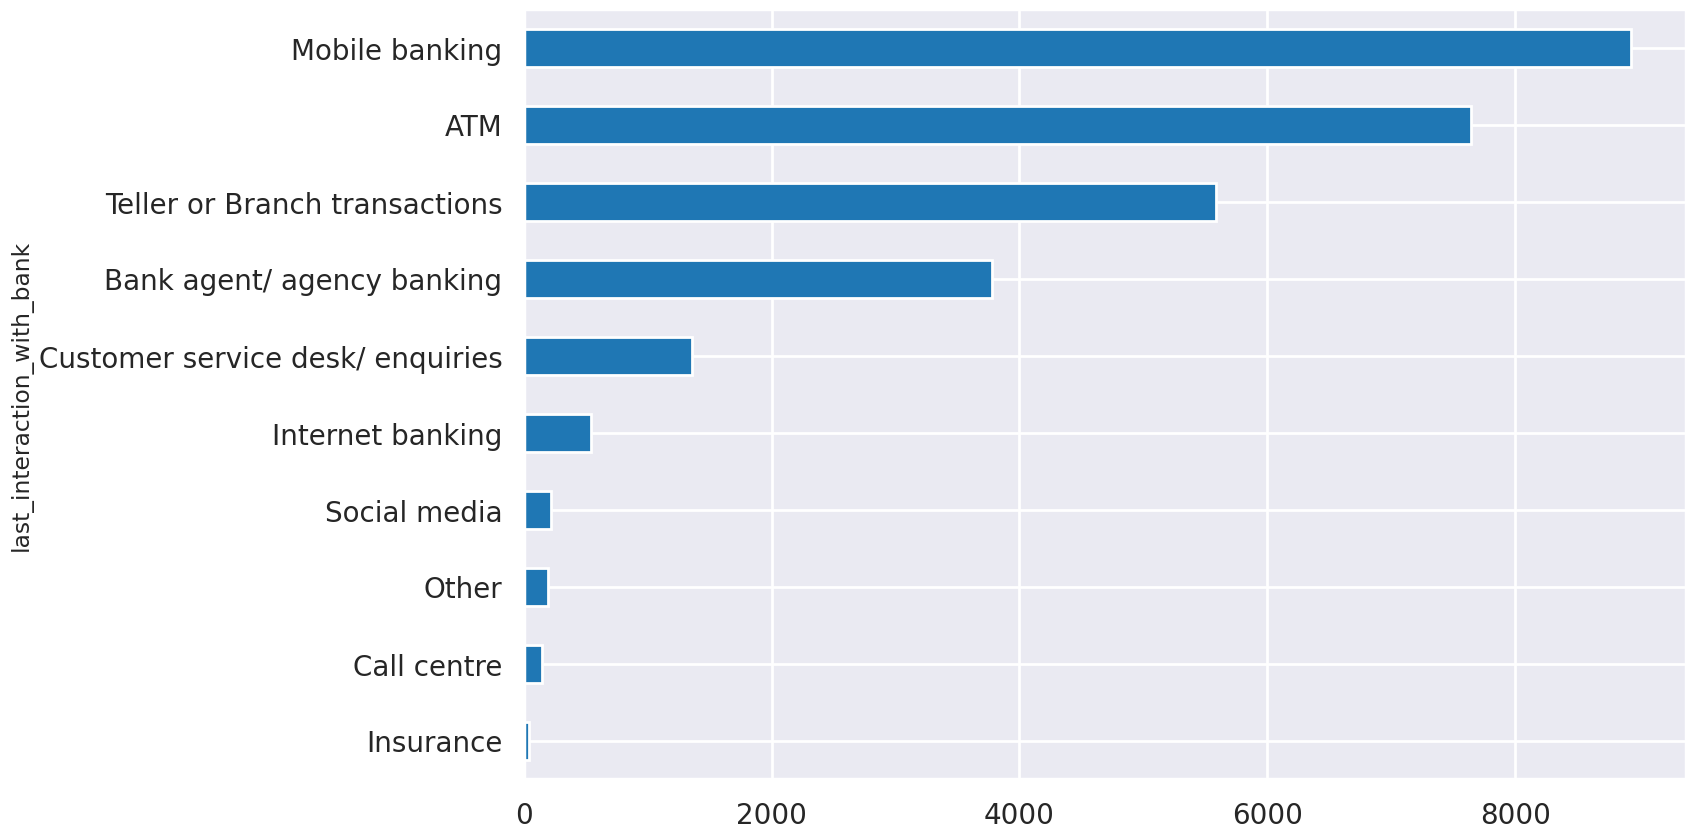

In [ ]:
response_rate('last_interaction_with_bank')

Customers seeking mobile banking, ATM, and teller services have a higher response rate than those seeking insurance and call center services.

###**Week**

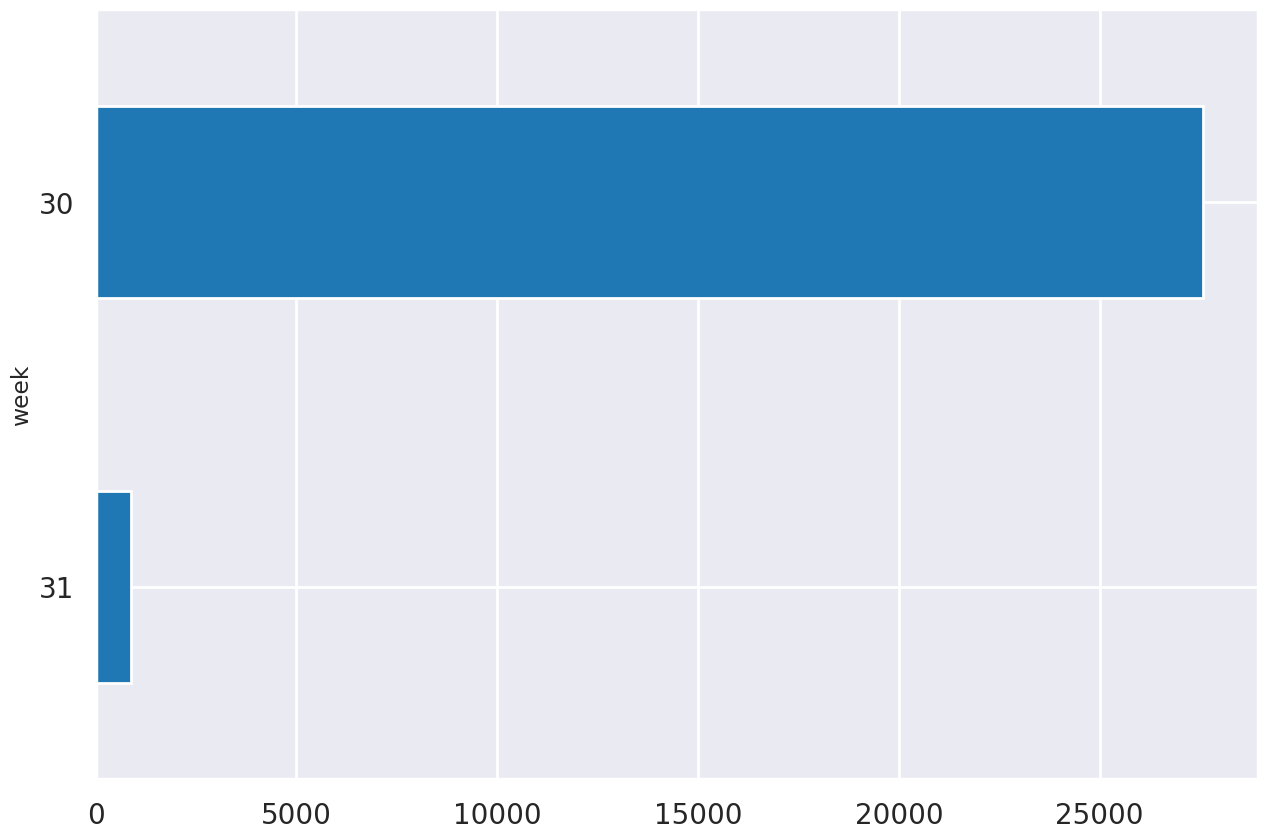

In [ ]:
response_rate('week')


There was a higher response rate in week 30 than in week 31

## 5. What themes are most associated with the likelihood to recommend a bank?

In [ ]:
feedback['themes']

1                   speed/efficiency
2                            service
4              account,rates/charges
5           service,speed/efficiency
7                      accessibility
                    ...             
6452                         service
6456                         service
6458                   accessibility
6460                speed/efficiency
6462    accessibility,mobile_banking
Name: themes, Length: 3632, dtype: object

Based on the samples visible above, we can see that there are many different themes in the themes column. To get more distinct categories, we shall use the split() function to separate the themes so that we can further analyze the column.

In [ ]:
# Splitting the string to various themes
feedback_2= feedback['themes'].str.split(',').apply(pd.Series)
feedback_2.head()

,0,1,2,3,4,5
1,speed/efficiency,NaN,NaN,NaN,NaN,NaN
2,service,NaN,NaN,NaN,NaN,NaN
4,account,rates/charges,NaN,NaN,NaN,NaN
5,service,speed/efficiency,NaN,NaN,NaN,NaN
7,accessibility,NaN,NaN,NaN,NaN,NaN


In [ ]:
feedback_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3632 entries, 1 to 6462
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2758 non-null   object
 1   1       986 non-null    object
 2   2       281 non-null    object
 3   3       76 non-null     object
 4   4       15 non-null     object
 5   5       3 non-null      object
dtypes: object(6)
memory usage: 198.6+ KB


In [ ]:
# Checking the unique values in the first column of the new dataframe
feedback_2[0].value_counts(dropna=False)

service                      1207
NaN                           874
accessibility                 543
speed/efficiency              419
account                       160
rates/charges                 138
security                       63
loan                           48
staff                          46
atm                            45
facilities                     29
information/communication      21
mobile_banking                 21
system                         11
online_banking                  4
resolved                        1
affordability                   1
new product                     1
Name: 0, dtype: int64

In [ ]:
response = pd.DataFrame(feedback['likelihood_to_recommend'])
themes_df = pd.DataFrame(feedback_2[0])

# concatenating the DataFrames. We only use the first level from the split.
level1 = response.join(themes_df)
level1


,likelihood_to_recommend,0
1,5,speed/efficiency
2,10,service
4,7,account
5,7,service
7,8,accessibility
...,...,...
6452,8,service
6456,10,service
6458,8,accessibility
6460,9,speed/efficiency


<Axes: ylabel='0'>

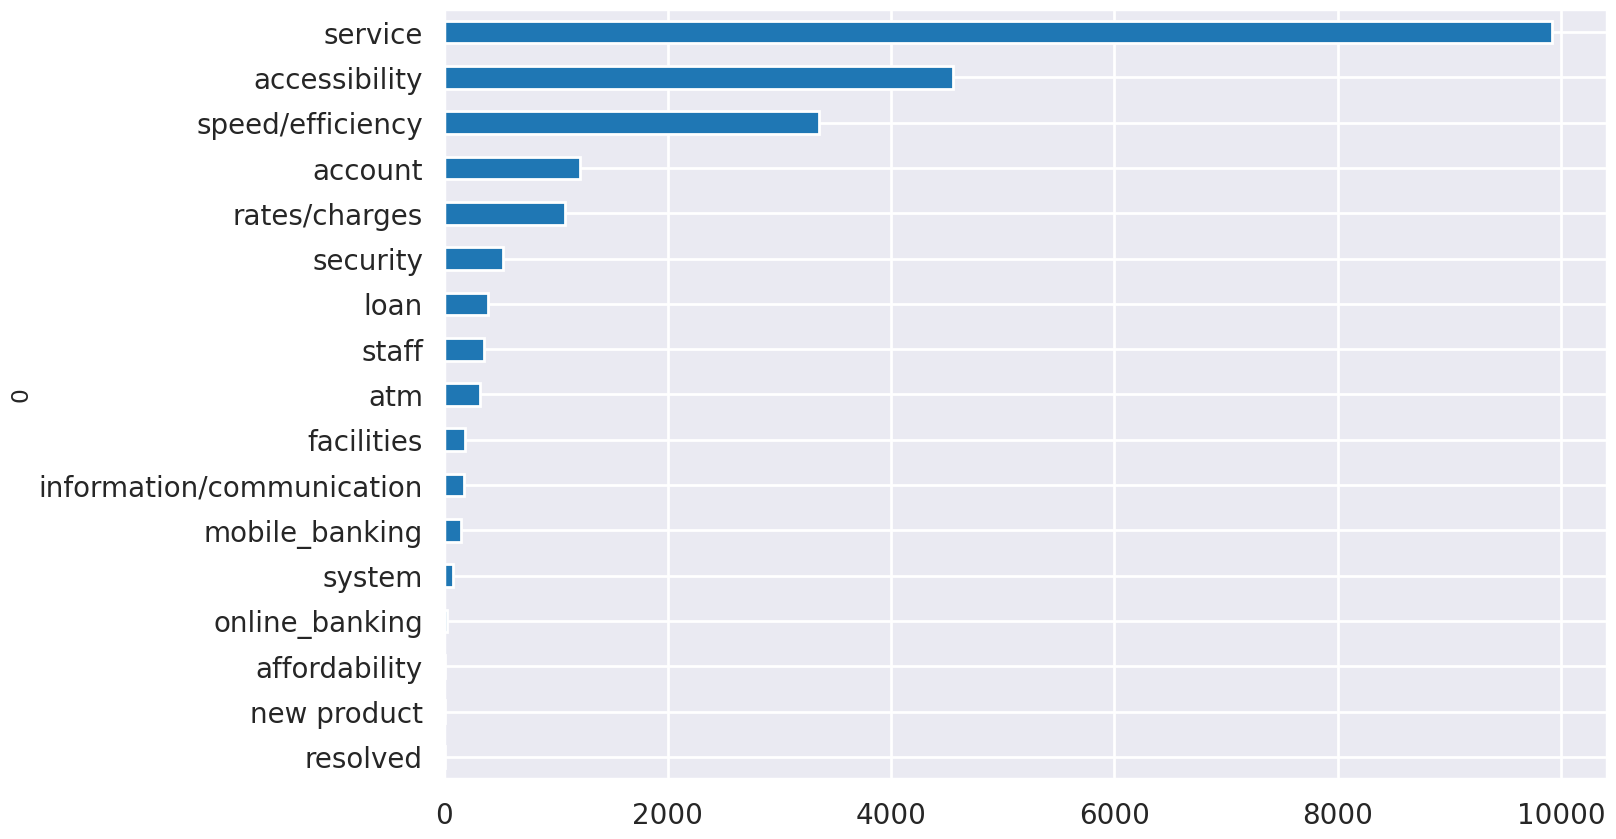

In [ ]:
# Calculating the Response Rate across the first column themes
df = level1.groupby(0)["likelihood_to_recommend"].sum().sort_values()
df.plot(kind="barh", fontsize=20, figsize=(15, 10))

**Assumption**

We assume that the themes appearing first, ie, before the comma are ranked higher than the succeeding ones.

Based on this assumption, we see that the themes most associated with the likelihood to recommend a bank are:


*   service
*   accessibility
*   speed/efficiency

